This notebook once served as a technical test from a certain tech company. The deadline was 7 days after the email received, and I must work on 2 from 3 projects provided. The other one will also be uploaded, but in another repository. This study case is about time series forecasting, and the other one is about sentiment analysis (natural language processing). Since I didn't have topics about those two in my github, I will add it. It was such a shame that I wasn't called for user interview after these hustles. On the top of it, I didn't know where I was wrong. Well anyway, wish me luck to get a job!

# Task
1. What insights can you get from order and delivery distribution data?
2. Project March 2021 Total Order;
3. Project the delivery distribution;
4. Explain the method and evaluation metrics used in both problems.

# Libraries

First, let's add some packages for data wrangling, basic data visualization, and basic statistical analysis.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro,ttest_ind,kruskal

# Data Load

The data was provided by the tech company as a technical test for data science position.

In [2]:
df = pd.read_csv('D:/Tes/Churn/Dataset 1.csv', sep=';', dtype={'Total Order':str}) # Decimal problem, so better to use str type to manually change the dtypes later 
df.drop(columns=['Unnamed: 8','Unnamed: 9'], inplace=True)
df.dropna(inplace=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 0 to 424
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order Date       425 non-null    object 
 1   Total Order      425 non-null    object 
 2   Delivered D+1    425 non-null    float64
 3   Delivered D+2    425 non-null    float64
 4   Delivered D+3    425 non-null    float64
 5   Delivered D+4    425 non-null    float64
 6   Delivered D+5    425 non-null    float64
 7   Delivered >=D+6  425 non-null    object 
dtypes: float64(5), object(3)
memory usage: 29.9+ KB


In [4]:
df.head()

Order Date Total Order  Delivered D+1  Delivered D+2  Delivered D+3  \
0  01/01/2020       8.794           50.0         2436.0         1504.0   
1  02/01/2020       3.496          622.0          622.0          210.0   
2  03/01/2020       3.384          562.0          328.0         1022.0   
3  04/01/2020       3.325           53.0           50.0         1007.0   
4  05/01/2020       3.230           74.0          543.0          759.0   

   Delivered D+4  Delivered D+5 Delivered >=D+6  
0          510.0         1776.0        2.518,00  
1          877.0          717.0          448,00  
2          589.0          447.0          436,00  
3          894.0          888.0          433,00  
4          849.0          601.0          404,00

The dataset came with 8 columns with no missing value, the time stamp data: order date, the total order in the date, and 6 columns of delivery distribution from total order. The sum of these 6 columns will be resulting in total order.

# Data Cleaning and Feature Engineering

Let's clean the data first. Also, let's see if we can make new columns that will help us in data wrangling/visualization.

## Extracting Date

Since the first column is date, the first thing that I did was extracting information about day, month, and year from the date. After that, I put them in new separate columns.

In [5]:
D = []
M = []
Y = []
for i in df['Order Date']:
    i = i.split('/')
    D.append(i[0])
    M.append(i[1])
    Y.append(i[2])

In [6]:
df['Day']=D
df['Month']=M
df['Year']=Y

In [7]:
df[['Day','Month','Year']]=df[['Day','Month','Year']].astype('int')

In [8]:
df.head()

Order Date Total Order  Delivered D+1  Delivered D+2  Delivered D+3  \
0  01/01/2020       8.794           50.0         2436.0         1504.0   
1  02/01/2020       3.496          622.0          622.0          210.0   
2  03/01/2020       3.384          562.0          328.0         1022.0   
3  04/01/2020       3.325           53.0           50.0         1007.0   
4  05/01/2020       3.230           74.0          543.0          759.0   

   Delivered D+4  Delivered D+5 Delivered >=D+6  Day  Month  Year  
0          510.0         1776.0        2.518,00    1      1  2020  
1          877.0          717.0          448,00    2      1  2020  
2          589.0          447.0          436,00    3      1  2020  
3          894.0          888.0          433,00    4      1  2020  
4          849.0          601.0          404,00    5      1  2020

## Changing Order Date Data Type

The order date loaded was still in object data type, thus we need to convert it to datetime. 

In [9]:
df['Order Date']=pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Order Date']

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-04
4     2020-01-05
         ...    
420   2021-02-24
421   2021-02-25
422   2021-02-26
423   2021-02-27
424   2021-02-28
Name: Order Date, Length: 425, dtype: datetime64[ns]

## Decimal in Total Order

Let's remove the decimal point from total order value.

In [10]:
df['Total Order']

0       8.794
1       3.496
2       3.384
3       3.325
4       3.230
        ...  
420    15.590
421    46.771
422    17.134
423    16.620
424    15.789
Name: Total Order, Length: 425, dtype: object

In [11]:
df['Total Order'].iloc[420]

'15.590'

In [12]:
num = []
for i in df['Total Order']:
    i = i.split('.')
    num.append(i[0]+i[1])
num

['8794',
 '3496',
 '3384',
 '3325',
 '3230',
 '4300',
 '4059',
 '3920',
 '3478',
 '3185',
 '3300',
 '3036',
 '3549',
 '3589',
 '3420',
 '3332',
 '2976',
 '2760',
 '2900',
 '3430',
 '3135',
 '3366',
 '3100',
 '3100',
 '5880',
 '3999',
 '5445',
 '4655',
 '4653',
 '4455',
 '3913',
 '4356',
 '12513',
 '5790',
 '5713',
 '5262',
 '5005',
 '5227',
 '4805',
 '5060',
 '5280',
 '4598',
 '4446',
 '4004',
 '4204',
 '3887',
 '3867',
 '4048',
 '4096',
 '3881',
 '3812',
 '3630',
 '3450',
 '3171',
 '3773',
 '7315',
 '5990',
 '5713',
 '5115',
 '4805',
 '4500',
 '5415',
 '14700',
 '6510',
 '6305',
 '6400',
 '5760',
 '4650',
 '6305',
 '6000',
 '5568',
 '5500',
 '5346',
 '5247',
 '4950',
 '5115',
 '4823',
 '4914',
 '5096',
 '4845',
 '4800',
 '4900',
 '5238',
 '5088',
 '9200',
 '6650',
 '6045',
 '5952',
 '5940',
 '7520',
 '7315',
 '7252',
 '7296',
 '7000',
 '19600',
 '6720',
 '8272',
 '7998',
 '7644',
 '7872',
 '7360',
 '7644',
 '6975',
 '8051',
 '7280',
 '7800',
 '7104',
 '6552',
 '6790',
 '6460',
 '6975'

In [13]:
df['Total Order']=num
df['Total Order']=df['Total Order'].astype('float')

In [14]:
df['Total Order']

0       8794.0
1       3496.0
2       3384.0
3       3325.0
4       3230.0
        ...   
420    15590.0
421    46771.0
422    17134.0
423    16620.0
424    15789.0
Name: Total Order, Length: 425, dtype: float64

In [15]:
df['Total Order'].describe()

count       425.000000
mean      12758.108235
std       11626.547062
min        2024.000000
25%        7000.000000
50%       11132.000000
75%       15344.000000
max      119291.000000
Name: Total Order, dtype: float64

In [16]:
df.head()

Order Date  Total Order  Delivered D+1  Delivered D+2  Delivered D+3  \
0 2020-01-01       8794.0           50.0         2436.0         1504.0   
1 2020-01-02       3496.0          622.0          622.0          210.0   
2 2020-01-03       3384.0          562.0          328.0         1022.0   
3 2020-01-04       3325.0           53.0           50.0         1007.0   
4 2020-01-05       3230.0           74.0          543.0          759.0   

   Delivered D+4  Delivered D+5 Delivered >=D+6  Day  Month  Year  
0          510.0         1776.0        2.518,00    1      1  2020  
1          877.0          717.0          448,00    2      1  2020  
2          589.0          447.0          436,00    3      1  2020  
3          894.0          888.0          433,00    4      1  2020  
4          849.0          601.0          404,00    5      1  2020

## Cleaning >=D+6 Column

The column contains unnecessary ,00 that makes it an object data type.

In [17]:
df.head()

Order Date  Total Order  Delivered D+1  Delivered D+2  Delivered D+3  \
0 2020-01-01       8794.0           50.0         2436.0         1504.0   
1 2020-01-02       3496.0          622.0          622.0          210.0   
2 2020-01-03       3384.0          562.0          328.0         1022.0   
3 2020-01-04       3325.0           53.0           50.0         1007.0   
4 2020-01-05       3230.0           74.0          543.0          759.0   

   Delivered D+4  Delivered D+5 Delivered >=D+6  Day  Month  Year  
0          510.0         1776.0        2.518,00    1      1  2020  
1          877.0          717.0          448,00    2      1  2020  
2          589.0          447.0          436,00    3      1  2020  
3          894.0          888.0          433,00    4      1  2020  
4          849.0          601.0          404,00    5      1  2020

Based on notes, we can easily fill the column with the subtraction of Total Order with the sum of Delivered D+1 to D+5.

In [18]:
df['Delivered >=D+6']=(df['Total Order']-df['Delivered D+1']-df['Delivered D+2']-df['Delivered D+3']-df['Delivered D+4']-df['Delivered D+5'])
df.head()

Order Date  Total Order  Delivered D+1  Delivered D+2  Delivered D+3  \
0 2020-01-01       8794.0           50.0         2436.0         1504.0   
1 2020-01-02       3496.0          622.0          622.0          210.0   
2 2020-01-03       3384.0          562.0          328.0         1022.0   
3 2020-01-04       3325.0           53.0           50.0         1007.0   
4 2020-01-05       3230.0           74.0          543.0          759.0   

   Delivered D+4  Delivered D+5  Delivered >=D+6  Day  Month  Year  
0          510.0         1776.0           2518.0    1      1  2020  
1          877.0          717.0            448.0    2      1  2020  
2          589.0          447.0            436.0    3      1  2020  
3          894.0          888.0            433.0    4      1  2020  
4          849.0          601.0            404.0    5      1  2020

In [19]:
df['Delivered >=D+6'].describe()

count      425.000000
mean      1650.341176
std       2891.854589
min        267.000000
25%        816.000000
50%       1341.000000
75%       1768.000000
max      52148.000000
Name: Delivered >=D+6, dtype: float64

## Campaign

There are several additional informations regarding events which are provided by the tech company, campaign and holiday. Let's make columns based on those informations.

### Double-Double Campaign

In [20]:
df.head()

Order Date  Total Order  Delivered D+1  Delivered D+2  Delivered D+3  \
0 2020-01-01       8794.0           50.0         2436.0         1504.0   
1 2020-01-02       3496.0          622.0          622.0          210.0   
2 2020-01-03       3384.0          562.0          328.0         1022.0   
3 2020-01-04       3325.0           53.0           50.0         1007.0   
4 2020-01-05       3230.0           74.0          543.0          759.0   

   Delivered D+4  Delivered D+5  Delivered >=D+6  Day  Month  Year  
0          510.0         1776.0           2518.0    1      1  2020  
1          877.0          717.0            448.0    2      1  2020  
2          589.0          447.0            436.0    3      1  2020  
3          894.0          888.0            433.0    4      1  2020  
4          849.0          601.0            404.0    5      1  2020

In [21]:
DDC = []
for i in range(len(df)):
    if df['Day'][i]==df['Month'][i]:
        DDC.append(1)
    else:
        DDC.append(0)
df['Double-Double Campaign']=DDC

In [22]:
df[df['Double-Double Campaign']==1][['Day','Month','Year']]

Day  Month  Year
0      1      1  2020
32     2      2  2020
62     3      3  2020
94     4      4  2020
125    5      5  2020
157    6      6  2020
188    7      7  2020
220    8      8  2020
252    9      9  2020
283   10     10  2020
315   11     11  2020
346   12     12  2020
366    1      1  2021
398    2      2  2021

In [23]:
df.head()

Order Date  Total Order  Delivered D+1  Delivered D+2  Delivered D+3  \
0 2020-01-01       8794.0           50.0         2436.0         1504.0   
1 2020-01-02       3496.0          622.0          622.0          210.0   
2 2020-01-03       3384.0          562.0          328.0         1022.0   
3 2020-01-04       3325.0           53.0           50.0         1007.0   
4 2020-01-05       3230.0           74.0          543.0          759.0   

   Delivered D+4  Delivered D+5  Delivered >=D+6  Day  Month  Year  \
0          510.0         1776.0           2518.0    1      1  2020   
1          877.0          717.0            448.0    2      1  2020   
2          589.0          447.0            436.0    3      1  2020   
3          894.0          888.0            433.0    4      1  2020   
4          849.0          601.0            404.0    5      1  2020   

   Double-Double Campaign  
0                       1  
1                       0  
2                       0  
3                       0  
4                       0

### Gajian Sale

In [24]:
GS = []
for i in range(len(df)):
    if (df['Day'][i]==25) and (df['Month'][i] in range (1, 5)):
        GS.append(1)
    elif (df['Day'][i]==25) and (df['Month'][i] in range (6, 12)):
        GS.append(1)
    elif (df['Day'][i]==28) and (df['Month'][i]==12):
        GS.append(1)
    else:
        GS.append(0)
df['Gajian Sale']=GS

In [25]:
df[df['Gajian Sale']==1][['Day','Month','Year']]

Day  Month  Year
24    25      1  2020
55    25      2  2020
84    25      3  2020
115   25      4  2020
176   25      6  2020
206   25      7  2020
237   25      8  2020
268   25      9  2020
298   25     10  2020
329   25     11  2020
362   28     12  2020
390   25      1  2021
421   25      2  2021

### Merdeka Sale

In [26]:
MS = []
for i in range(len(df)):
    if (df['Day'][i]==17) and (df['Month'][i]==8):
        MS.append(1)
    else:
        MS.append(0)
df['Merdeka Sale']=MS

In [27]:
df[df['Merdeka Sale']==1][['Day','Month','Year']]

Day  Month  Year
229   17      8  2020

### Campaign in General

In [28]:
Campaign = []
for i in range(len(df)):
    if (df['Double-Double Campaign'][i]==1) | (df['Gajian Sale'][i]==1) | (df['Merdeka Sale'][i]==1):
        Campaign.append(1)
    else:
        Campaign.append(0)
df['Campaign']=Campaign

In [29]:
df[df['Campaign']==1][['Day','Month','Year']]

Day  Month  Year
0      1      1  2020
24    25      1  2020
32     2      2  2020
55    25      2  2020
62     3      3  2020
84    25      3  2020
94     4      4  2020
115   25      4  2020
125    5      5  2020
157    6      6  2020
176   25      6  2020
188    7      7  2020
206   25      7  2020
220    8      8  2020
229   17      8  2020
237   25      8  2020
252    9      9  2020
268   25      9  2020
283   10     10  2020
298   25     10  2020
315   11     11  2020
329   25     11  2020
346   12     12  2020
362   28     12  2020
366    1      1  2021
390   25      1  2021
398    2      2  2021
421   25      2  2021

## Holiday

### New Year

In [30]:
NY = []
for i in range(len(df)):
    if (df['Day'][i]==1) and (df['Month'][i]==1):
        NY.append(1)
    else:
        NY.append(0)
df['New Year']=NY

In [31]:
df[df['New Year']==1][['Day','Month','Year']]

Day  Month  Year
0      1      1  2020
366    1      1  2021

### May Day

In [32]:
MD = []
for i in range(len(df)):
    if (df['Day'][i]==1) and (df['Month'][i]==5):
        MD.append(1)
    else:
        MD.append(0)
df['May Day']=MD

In [33]:
df[df['May Day']==1][['Day','Month','Year']]

Day  Month  Year
121    1      5  2020

### Lebaran

In [34]:
L = []
for i in range(len(df)):
    if (df['Day'][i]==23) and (df['Month'][i]==5) and (df['Year'][i]==2020):
        L.append(1)
    else:
        L.append(0)
df['Lebaran']=L

In [35]:
df[df['Lebaran']==1][['Day','Month','Year']]

Day  Month  Year
143   23      5  2020

### Natal

In [36]:
N = []
for i in range(len(df)):
    if (df['Day'][i]==25) and (df['Month'][i]==12):
        N.append(1)
    else:
        N.append(0)
df['Natal']=N

In [37]:
df[df['Natal']==1][['Day','Month','Year']]

Day  Month  Year
359   25     12  2020

### Holiday in General

In [38]:
Libur = []
for i in range(len(df)):
    if (df['New Year'][i]==1) | (df['May Day'][i]==1) | (df['Lebaran'][i]==1) | (df['Natal'][i]==1):
        Libur.append(1)
    else:
        Libur.append(0)
df['Holiday']=Libur

In [39]:
df[df['Holiday']==1][['Day','Month','Year']]

Day  Month  Year
0      1      1  2020
121    1      5  2020
143   23      5  2020
359   25     12  2020
366    1      1  2021

## Period of Month, Week and Day

I predict that I will need columns that will indicate the period time of the month, also about weekend and weekday, and day name. It will help us in data visualization to find patterns.

### Indicating a Period Time of the Month

For simplicity, let's differ each period by 6 days. For example: 1-6 means period 1; 7-12 means period 2; etc.

In [40]:
Week = []
for i in range(len(df)):
    if (df['Day'][i] in (1,2,3,4,5,6)):
        Week.append(1)
    elif (df['Day'][i] in (7, 8,9,10,11,12)):
        Week.append(2)
    elif (df['Day'][i] in (13,14, 15,16,17,18)):
        Week.append(3)
    elif (df['Day'][i] in (19,20,21,22,23,24)):
        Week.append(4)
    elif (df['Day'][i] in (25,26,27,28,29,30,31)):
        Week.append(5)
df['Period_of_Month']=Week

In [41]:
df['Period_of_Month'].value_counts()

5    89
1    84
2    84
3    84
4    84
Name: Period_of_Month, dtype: int64

### Weekday and Weekend

In [42]:
import datetime

In [43]:
df['Order Date'][1].strftime("%A")

'Thursday'

In [44]:
Weekday = []
for i in range(len(df)):
    if (df['Order Date'][i].strftime('%A') in ('Monday','Tuesday','Wednesday','Thursday','Friday')):
        Weekday.append(1)
    else:
        Weekday.append(0)
df['Weekday']=Weekday

In [45]:
df['Weekday'].value_counts()

1    303
0    122
Name: Weekday, dtype: int64

### Day Name

In [46]:
DayName = []
for i in range(len(df)):
    DayName.append(df['Order Date'][i].strftime('%A'))
df['DayName']=DayName

In [47]:
df['DayName'].value_counts()

Wednesday    61
Thursday     61
Friday       61
Saturday     61
Sunday       61
Monday       60
Tuesday      60
Name: DayName, dtype: int64

## Latest Data

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 0 to 424
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order Date              425 non-null    datetime64[ns]
 1   Total Order             425 non-null    float64       
 2   Delivered D+1           425 non-null    float64       
 3   Delivered D+2           425 non-null    float64       
 4   Delivered D+3           425 non-null    float64       
 5   Delivered D+4           425 non-null    float64       
 6   Delivered D+5           425 non-null    float64       
 7   Delivered >=D+6         425 non-null    float64       
 8   Day                     425 non-null    int32         
 9   Month                   425 non-null    int32         
 10  Year                    425 non-null    int32         
 11  Double-Double Campaign  425 non-null    int64         
 12  Gajian Sale             425 non-null    int64     

In [49]:
df.head()

Order Date  Total Order  Delivered D+1  Delivered D+2  Delivered D+3  \
0 2020-01-01       8794.0           50.0         2436.0         1504.0   
1 2020-01-02       3496.0          622.0          622.0          210.0   
2 2020-01-03       3384.0          562.0          328.0         1022.0   
3 2020-01-04       3325.0           53.0           50.0         1007.0   
4 2020-01-05       3230.0           74.0          543.0          759.0   

   Delivered D+4  Delivered D+5  Delivered >=D+6  Day  Month  ...  \
0          510.0         1776.0           2518.0    1      1  ...   
1          877.0          717.0            448.0    2      1  ...   
2          589.0          447.0            436.0    3      1  ...   
3          894.0          888.0            433.0    4      1  ...   
4          849.0          601.0            404.0    5      1  ...   

   Merdeka Sale  Campaign  New Year  May Day  Lebaran  Natal  Holiday  \
0             0         1         1        0        0      0        1   
1             0         0         0        0        0      0        0   
2             0         0         0        0        0      0        0   
3             0         0         0        0        0      0        0   
4             0         0         0        0        0      0        0   

   Period_of_Month  Weekday    DayName  
0                1        1  Wednesday  
1                1        1   Thursday  
2                1        1     Friday  
3                1        0   Saturday  
4                1        0     Sunday  

[5 rows x 23 columns]

*Voila*, now the data is ready to be explored further.

# Exploratory Data Analysis

The EDA section will help us understand the data.

## Total Order

First of all, let's explore the main character of this story: total order.

### Distribution

First of all, the distribution. I am not quite sure how a distribution will help us in time series forecasting, but let's just add it, just as an information.

<Figure size 576x360 with 0 Axes>

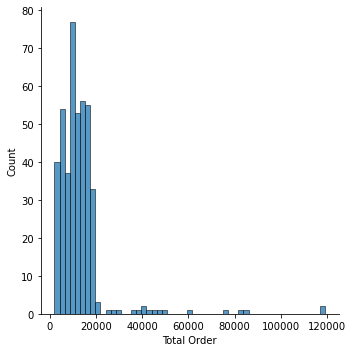

In [50]:
plt.figure(figsize=(8,5))
sns.displot(df['Total Order'])
plt.show()

In [51]:
stats, pval= shapiro(df['Total Order'])
if pval>0.05:
    print('Terima Ho, distribusi normal')
else:
    print('Tolak Ho, distribusi tidak normal')

Tolak Ho, distribusi tidak normal


<Figure size 576x360 with 0 Axes>

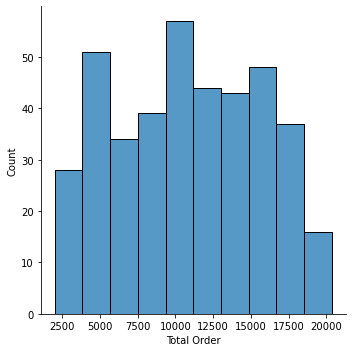

In [52]:
forplot=df[(df['Campaign']==0)]
plt.figure(figsize=(8,5))
sns.displot(forplot['Total Order'])
plt.show()

In [53]:
stats, pval= shapiro(forplot['Total Order'])
if pval>0.05:
    print('Terima Ho, distribusi normal')
else:
    print('Tolak Ho, distribusi tidak normal')

Tolak Ho, distribusi tidak normal


The data in total order were not normally distributed, even after the removal of outliers.

### Total Order by Time

Let's make a visualization of total order by time.

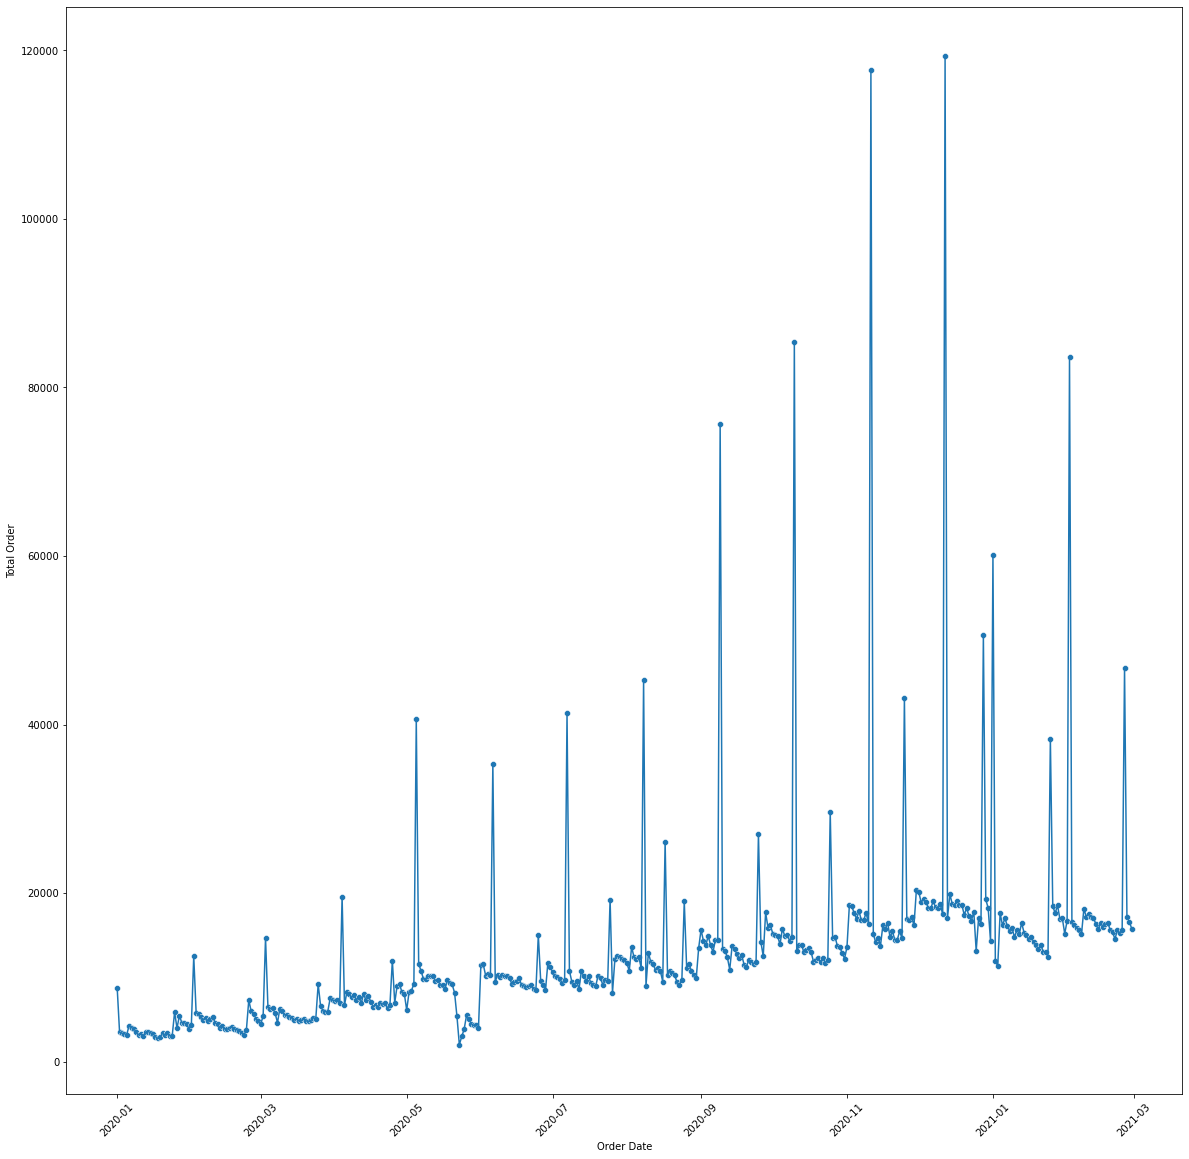

In [54]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Order Date', y='Total Order', data=df)
sns.lineplot(x='Order Date', y='Total Order', data=df)
plt.xticks(rotation=45)
plt.show()

From the graph above, the data is definitely not stationary. There are pattern of seasonality with several peaks due to (probably) events. With this information in mind, we can't use ARIMA method for the time series forecasting of this dataset.

### Total Order by Campaign and Holiday

The total order was gradually increased in time. First, let's prove that the peaks are caused by events (campaign and/or holiday).

In [113]:
df[(df['Campaign']==0)&(df['Holiday']==0)].groupby(['Year','Month'])['Total Order'].describe().reset_index()[['Year','Month','max']]

Year  Month      max
0   2020      1   5445.0
1   2020      2   5990.0
2   2020      3   7520.0
3   2020      4   9200.0
4   2020      5  11616.0
5   2020      6  11737.0
6   2020      7  12524.0
7   2020      8  13613.0
8   2020      9  17710.0
9   2020     10  15771.0
10  2020     11  20348.0
11  2020     12  20159.0
12  2021      1  18544.0
13  2021      2  18129.0

In [56]:
df[(df['Campaign']==1)][['Order Date','Total Order']]

Order Date  Total Order
0   2020-01-01       8794.0
24  2020-01-25       5880.0
32  2020-02-02      12513.0
55  2020-02-25       7315.0
62  2020-03-03      14700.0
84  2020-03-25       9200.0
94  2020-04-04      19600.0
115 2020-04-25      12000.0
125 2020-05-05      40641.0
157 2020-06-06      35335.0
176 2020-06-25      15015.0
188 2020-07-07      41400.0
206 2020-07-25      19250.0
220 2020-08-08      45345.0
229 2020-08-17      26125.0
237 2020-08-25      19019.0
252 2020-09-09      75657.0
268 2020-09-25      26995.0
283 2020-10-10      85410.0
298 2020-10-25      29645.0
315 2020-11-11     117670.0
329 2020-11-25      43175.0
346 2020-12-12     119291.0
362 2020-12-28      50578.0
366 2021-01-01      60120.0
390 2021-01-25      38278.0
398 2021-02-02      83573.0
421 2021-02-25      46771.0

In [57]:
df[(df['Holiday']==1)][['Order Date','Total Order']]

Order Date  Total Order
0   2020-01-01       8794.0
121 2020-05-01       6138.0
143 2020-05-23       2024.0
359 2020-12-25      13166.0
366 2021-01-01      60120.0

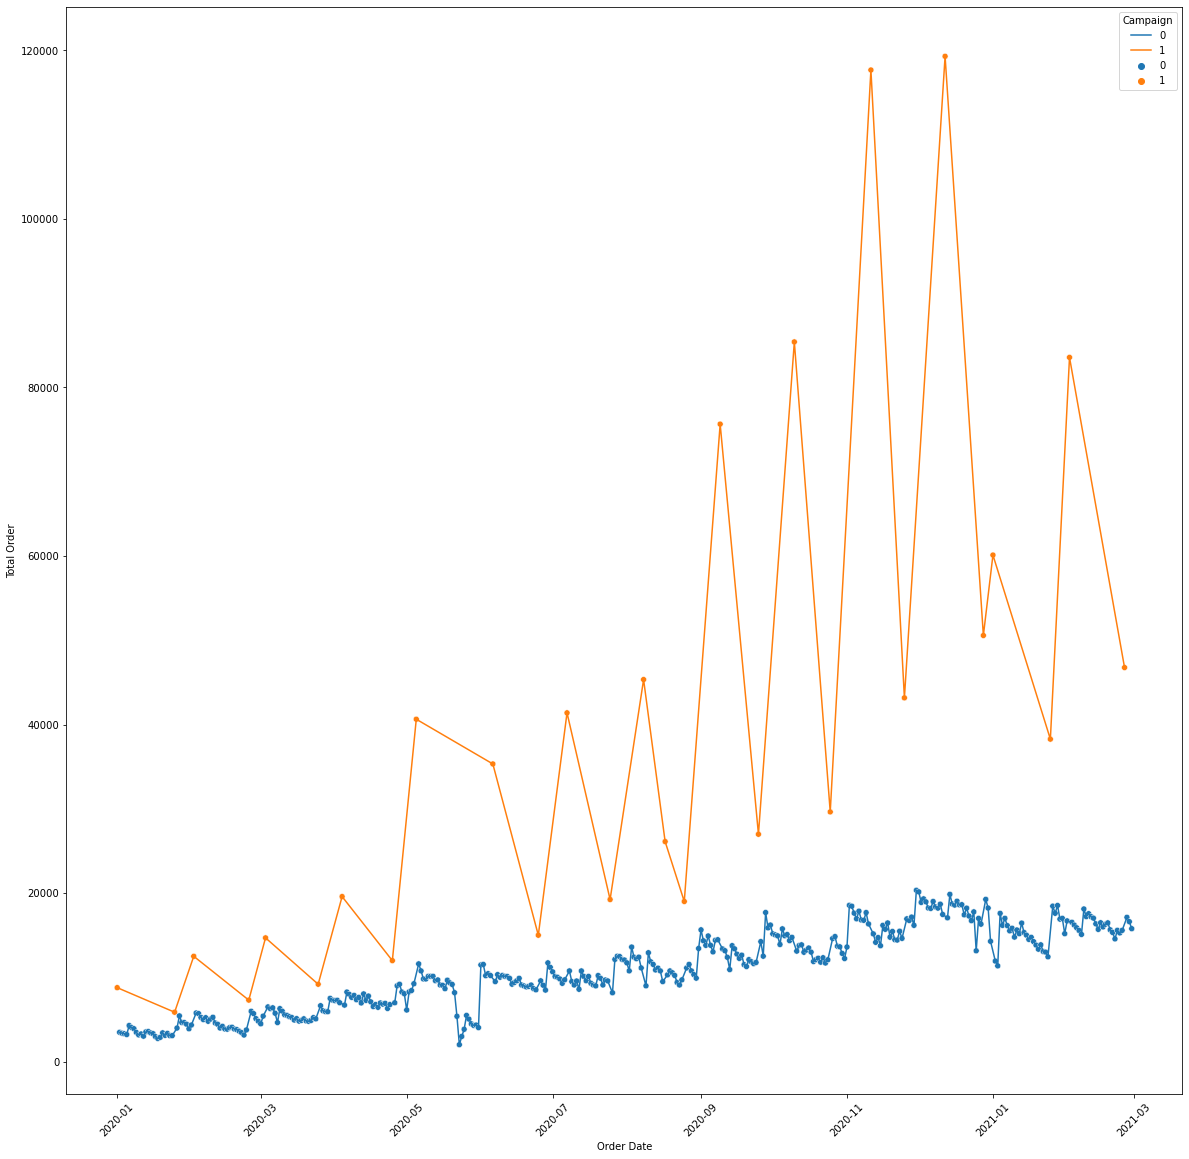

In [58]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Order Date', y='Total Order', hue='Campaign', data=df)
sns.lineplot(x='Order Date', y='Total Order', hue='Campaign', data=df)
plt.xticks(rotation=45)
plt.show()

It is clear that Double-Double Campaign are superior to the rest of the campaigns. Also, increase in time resulting in increase of total order of campaigns.

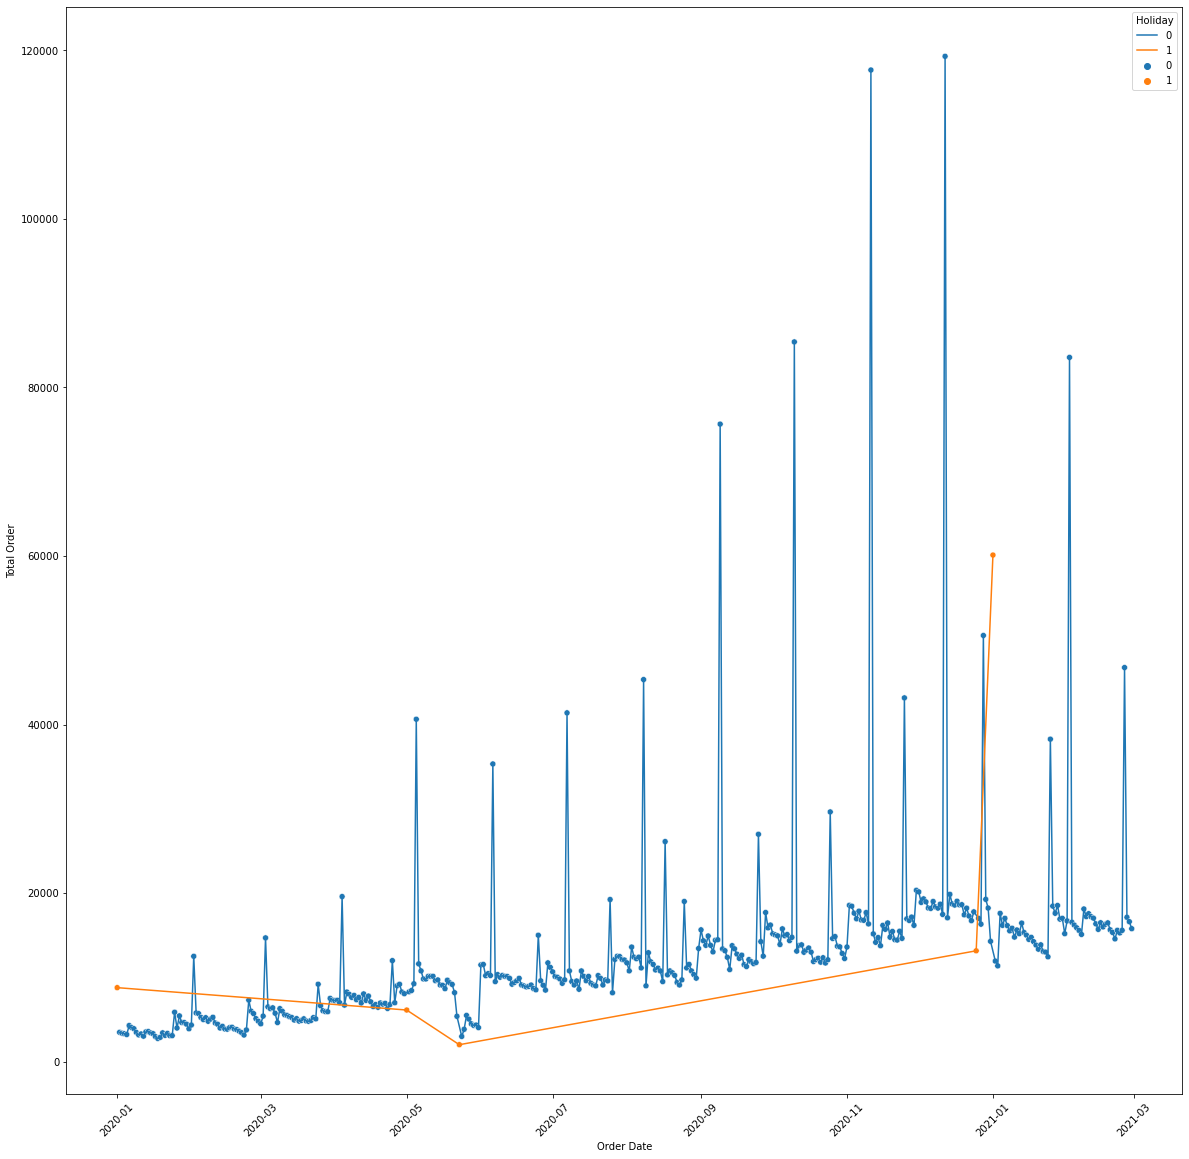

In [59]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Order Date', y='Total Order', hue='Holiday', data=df)
sns.lineplot(x='Order Date', y='Total Order', hue='Holiday', data=df)
plt.xticks(rotation=45)
plt.show()

From two graphs above, it's proved that the peak was caused by campaign, but not by holiday. The increase in total order on 1 January caused by the Double-Double Campaign, not by the New Year holiday. So, we can say that the campaigns were successful in increasing the purchasing power of buyers.

### Total Order by Week (Non-Campaign)

Let's see the pattern of purchase power without any campaigns. Hopefully, there will be informations that will help us improve the campaigns or making a new campaign.

In [60]:
pd.set_option('display.max_rows',None)
forplot=df[(df['Campaign']==0)].groupby(['Year','Month','Period_of_Month'])['Total Order'].sum().reset_index()
forplot

Year  Month  Period_of_Month  Total Order
0   2020      1                1      17735.0
1   2020      1                2      20978.0
2   2020      1                3      19626.0
3   2020      1                4      19031.0
4   2020      1                5      27120.0
5   2020      2                1      26126.0
6   2020      2                2      29416.0
7   2020      2                3      24106.0
8   2020      2                4      21717.0
9   2020      2                5      21623.0
10  2020      3                1      29130.0
11  2020      3                2      33783.0
12  2020      3                3      30395.0
13  2020      3                4      29967.0
14  2020      3                5      39422.0
15  2020      4                1      36540.0
16  2020      4                2      45493.0
17  2020      4                3      43577.0
18  2020      4                4      40319.0
19  2020      4                5      41572.0
20  2020      5                1      43757.0
21  2020      5                2      60832.0
22  2020      5                3      55858.0
23  2020      5                4      37155.0
24  2020      5                5      31627.0
25  2020      6                1      53942.0
26  2020      6                2      60382.0
27  2020      6                3      57127.0
28  2020      6                4      53141.0
29  2020      6                5      50127.0
30  2020      7                1      59664.0
31  2020      7                2      47584.0
32  2020      7                3      59067.0
33  2020      7                4      57546.0
34  2020      7                5      69554.0
35  2020      8                1      73180.0
36  2020      8                2      56485.0
37  2020      8                3      52601.0
38  2020      8                4      59819.0
39  2020      8                5      67159.0
40  2020      9                1      85603.0
41  2020      9                2      67857.0
42  2020      9                3      75796.0
43  2020      9                4      70224.0
44  2020      9                5      76601.0
45  2020     10                1      89805.0
46  2020     10                2      71145.0
47  2020     10                3      78509.0
48  2020     10                4      72369.0
49  2020     10                5      81925.0
50  2020     11                1     103105.0
51  2020     11                2      82827.0
52  2020     11                3      91045.0
53  2020     11                4      89291.0
54  2020     11                5      87426.0
55  2020     12                1     113795.0
56  2020     12                2      91795.0
57  2020     12                3     111915.0
58  2020     12                4     106106.0
59  2020     12                5      98305.0
60  2021      1                1      74128.0
61  2021      1                2      93145.0
62  2021      1                3      90343.0
63  2021      1                4      79614.0
64  2021      1                5     103766.0
65  2021      2                1      80946.0
66  2021      2                2     102283.0
67  2021      2                3      97357.0
68  2021      2                4      92049.0
69  2021      2                5      49543.0

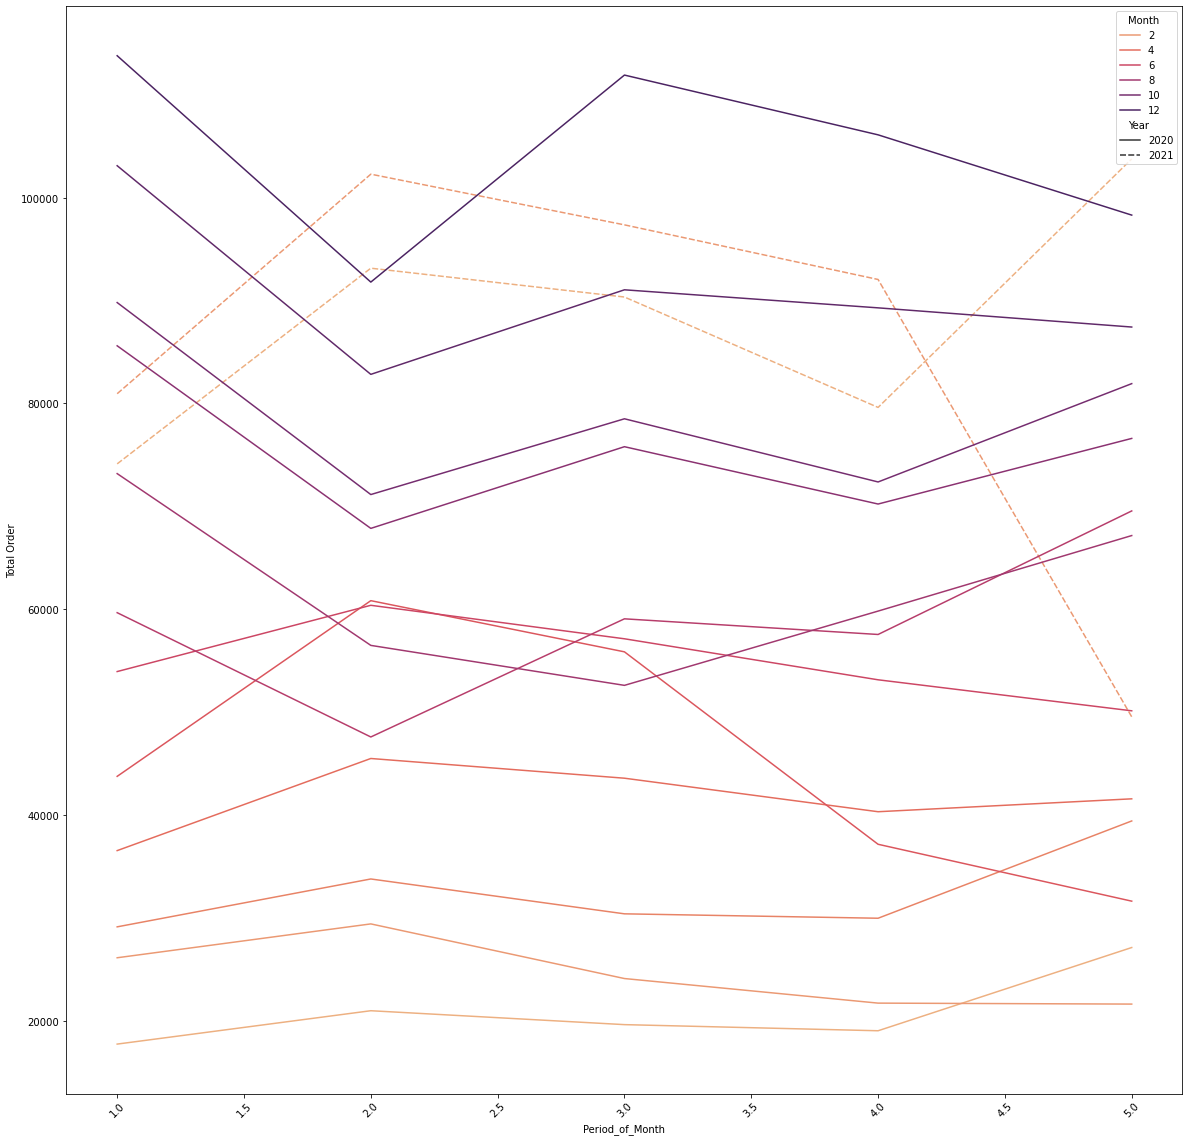

In [61]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Period_of_Month',y='Total Order', hue='Month', style='Year',data=forplot, palette="flare")
plt.xticks(rotation=45)
plt.show()

Based on graph above:
1. There are declines of purchase powers in period 1 to period 2 of each months from July to December, followed by increase of total order from period 2 to period 3.
2. Increase of total orders in period 1 to period 2 of each months from January to June. The fluctuation of total order was subjectively/seen stable. 
3. Despite the trend of period each month, the total order overall was increased steadily over time.
4. The pandemic of COVID-19 didn't affect the purchase power of people overall.

Because the difference in total order by date, I think it's best to make them into percent of change from each period of month. Let's say that the first period is 0 because it is the starting point, the change from first to second period will be in percentage, and second to third also, and so on. Maybe there are patterns that will visualize the behavior of the customers.

In [62]:
# Changes of Total Order based on Week per Month:
a=forplot['Year'].unique()
b=forplot['Month'].unique()
c = []
for i in a:
    for j in b:
        z=forplot[(forplot['Year']==i)&(forplot['Month']==j)]['Total Order'].pct_change()
        z.fillna(0,inplace=True)
        c.append(list(z))
d = []
for i in c:
    for j in i:
        d.append(j)
print(d)

[0.0, 0.1828587538765154, -0.06444846982553154, -0.030316926526036903, 0.425043350323157, 0.0, 0.12592819413610967, -0.18051400598313838, -0.09910395752094914, -0.004328406317631317, 0.0, 0.15973223480947474, -0.10028712666133854, -0.01408126336568516, 0.31551373177161546, 0.0, 0.2450191570881226, -0.042116369551359556, -0.07476421047800441, 0.031077159651777153, 0.0, 0.3902232785611446, -0.08176617569700162, -0.33483117906119086, -0.1487821289193917, 0.0, 0.1193874902673242, -0.05390679341525617, -0.069774362385562, -0.056717035810391225, 0.0, -0.20246714936980426, 0.24132061197041033, -0.02575041901569408, 0.2086678483300317, 0.0, -0.22813610276031704, -0.06876161812870674, 0.1372217258227031, 0.12270348885805515, 0.0, -0.2073058187213065, 0.11699603578112794, -0.07351311414850392, 0.09080940988835717, 0.0, -0.2077835309837982, 0.10350692248225446, -0.07820759403380506, 0.13204548909063263, 0.0, -0.19667329421463553, 0.09921885375541795, -0.0192651985282003, -0.020886763503600636, 0.

In [63]:
forplot['Diff by Week per Month']=d

In [64]:
forplot['Diff by Week per Month']=forplot['Diff by Week per Month']*100

In [65]:
forplot

Year  Month  Period_of_Month  Total Order  Diff by Week per Month
0   2020      1                1      17735.0                0.000000
1   2020      1                2      20978.0               18.285875
2   2020      1                3      19626.0               -6.444847
3   2020      1                4      19031.0               -3.031693
4   2020      1                5      27120.0               42.504335
5   2020      2                1      26126.0                0.000000
6   2020      2                2      29416.0               12.592819
7   2020      2                3      24106.0              -18.051401
8   2020      2                4      21717.0               -9.910396
9   2020      2                5      21623.0               -0.432841
10  2020      3                1      29130.0                0.000000
11  2020      3                2      33783.0               15.973223
12  2020      3                3      30395.0              -10.028713
13  2020      3                4      29967.0               -1.408126
14  2020      3                5      39422.0               31.551373
15  2020      4                1      36540.0                0.000000
16  2020      4                2      45493.0               24.501916
17  2020      4                3      43577.0               -4.211637
18  2020      4                4      40319.0               -7.476421
19  2020      4                5      41572.0                3.107716
20  2020      5                1      43757.0                0.000000
21  2020      5                2      60832.0               39.022328
22  2020      5                3      55858.0               -8.176618
23  2020      5                4      37155.0              -33.483118
24  2020      5                5      31627.0              -14.878213
25  2020      6                1      53942.0                0.000000
26  2020      6                2      60382.0               11.938749
27  2020      6                3      57127.0               -5.390679
28  2020      6                4      53141.0               -6.977436
29  2020      6                5      50127.0               -5.671704
30  2020      7                1      59664.0                0.000000
31  2020      7                2      47584.0              -20.246715
32  2020      7                3      59067.0               24.132061
33  2020      7                4      57546.0               -2.575042
34  2020      7                5      69554.0               20.866785
35  2020      8                1      73180.0                0.000000
36  2020      8                2      56485.0              -22.813610
37  2020      8                3      52601.0               -6.876162
38  2020      8                4      59819.0               13.722173
39  2020      8                5      67159.0               12.270349
40  2020      9                1      85603.0                0.000000
41  2020      9                2      67857.0              -20.730582
42  2020      9                3      75796.0               11.699604
43  2020      9                4      70224.0               -7.351311
44  2020      9                5      76601.0                9.080941
45  2020     10                1      89805.0                0.000000
46  2020     10                2      71145.0              -20.778353
47  2020     10                3      78509.0               10.350692
48  2020     10                4      72369.0               -7.820759
49  2020     10                5      81925.0               13.204549
50  2020     11                1     103105.0                0.000000
51  2020     11                2      82827.0              -19.667329
52  2020     11                3      91045.0                9.921885
53  2020     11                4      89291.0               -1.926520
54  2020     11                5      87426.0               -2.088676
55  2020     12                1     113795.0                0.000000
56  2020     1

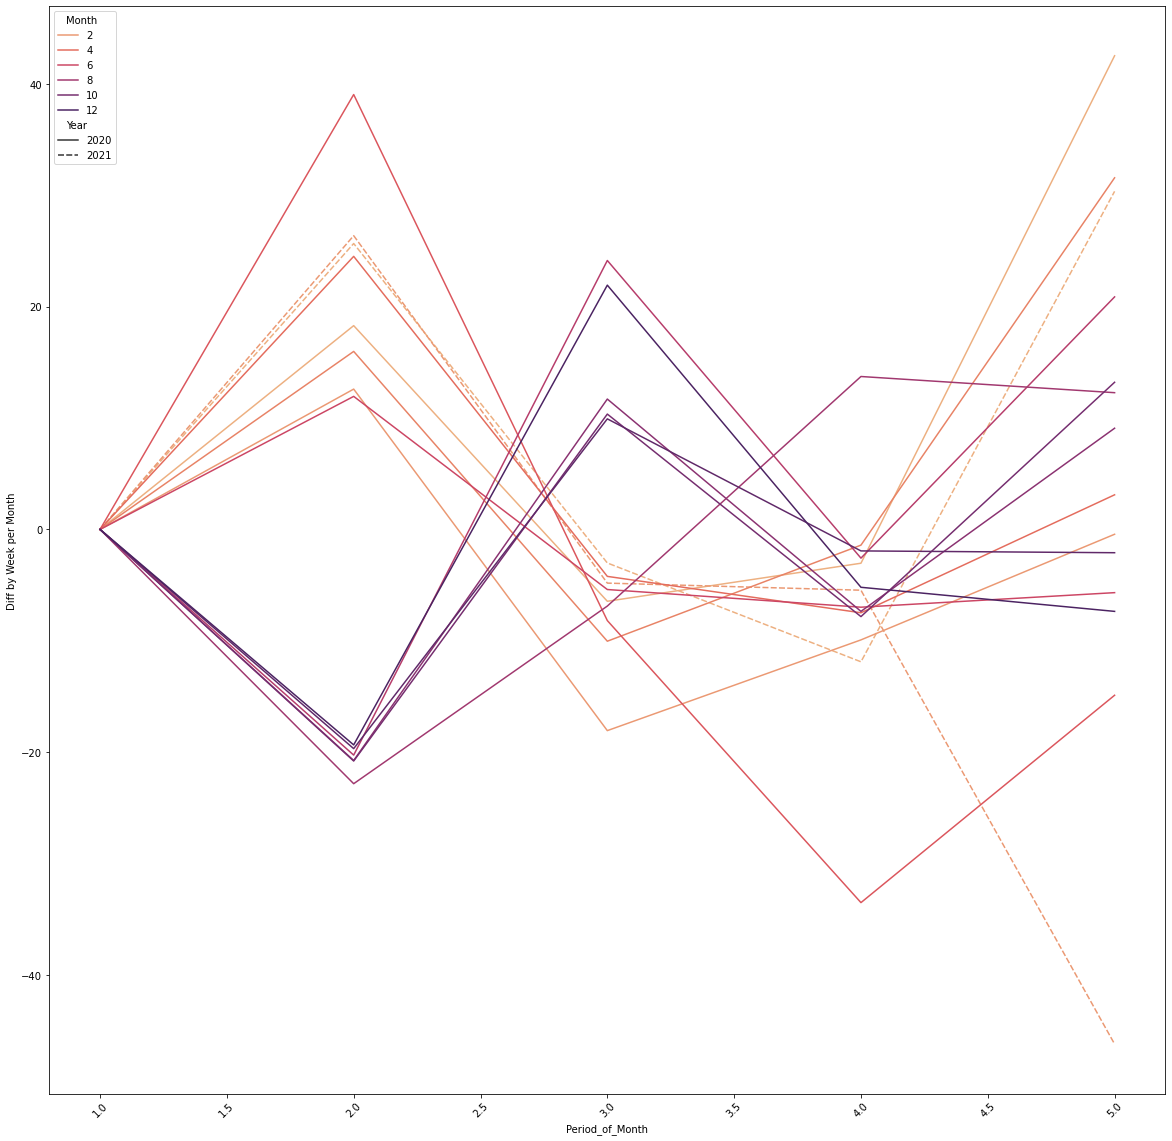

In [66]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Period_of_Month',y='Diff by Week per Month', hue='Month', style='Year',data=forplot, palette="flare")
plt.xticks(rotation=45)
plt.show()

The graph above further proves that the peak of purchase in January to June is located at period 2, while in July to December is located at period 3. There are significant decreases of total order in May 2020 and February 2021. 

From these information, we can make strategies to improve the total order, for example:
1. For July to December, we can replace the double-double dates with a new similar campaign on the second period of month. So, the campaign will help to stabilize the reducing total order.
2. Or maybe, from another point of view, we can put campaigns in the peak of people's purchasing power to make it more elevated. So, people will buy more than they should be because they have bigger purchasing power (money).

### Sudden Decline of Total Order on May 2020

Now, let's explore the sudden decline in total order.

In [67]:
forplot[(forplot['Period_of_Month']==4)&(forplot['Year']==2020)] # Month 5; Year 2020

Year  Month  Period_of_Month  Total Order  Diff by Week per Month
3   2020      1                4      19031.0               -3.031693
8   2020      2                4      21717.0               -9.910396
13  2020      3                4      29967.0               -1.408126
18  2020      4                4      40319.0               -7.476421
23  2020      5                4      37155.0              -33.483118
28  2020      6                4      53141.0               -6.977436
33  2020      7                4      57546.0               -2.575042
38  2020      8                4      59819.0               13.722173
43  2020      9                4      70224.0               -7.351311
48  2020     10                4      72369.0               -7.820759
53  2020     11                4      89291.0               -1.926520
58  2020     12                4     106106.0               -5.190546

In [68]:
forplot[(forplot['Month']==5)&(forplot['Year']==2020)]

Year  Month  Period_of_Month  Total Order  Diff by Week per Month
20  2020      5                1      43757.0                0.000000
21  2020      5                2      60832.0               39.022328
22  2020      5                3      55858.0               -8.176618
23  2020      5                4      37155.0              -33.483118
24  2020      5                5      31627.0              -14.878213

In [69]:
forplot[(forplot['Period_of_Month']==4)|(forplot['Period_of_Month']==5)]

Year  Month  Period_of_Month  Total Order  Diff by Week per Month
3   2020      1                4      19031.0               -3.031693
4   2020      1                5      27120.0               42.504335
8   2020      2                4      21717.0               -9.910396
9   2020      2                5      21623.0               -0.432841
13  2020      3                4      29967.0               -1.408126
14  2020      3                5      39422.0               31.551373
18  2020      4                4      40319.0               -7.476421
19  2020      4                5      41572.0                3.107716
23  2020      5                4      37155.0              -33.483118
24  2020      5                5      31627.0              -14.878213
28  2020      6                4      53141.0               -6.977436
29  2020      6                5      50127.0               -5.671704
33  2020      7                4      57546.0               -2.575042
34  2020      7                5      69554.0               20.866785
38  2020      8                4      59819.0               13.722173
39  2020      8                5      67159.0               12.270349
43  2020      9                4      70224.0               -7.351311
44  2020      9                5      76601.0                9.080941
48  2020     10                4      72369.0               -7.820759
49  2020     10                5      81925.0               13.204549
53  2020     11                4      89291.0               -1.926520
54  2020     11                5      87426.0               -2.088676
58  2020     12                4     106106.0               -5.190546
59  2020     12                5      98305.0               -7.352082
63  2021      1                4      79614.0              -11.875851
64  2021      1                5     103766.0               30.336373
68  2021      2                4      92049.0               -5.452099
69  2021      2                5      49543.0              -46.177579

From tables and graph above, the decrease of total order from period 3 to period 4 of May 2020 were unexpectedly high. What happened? Week 4 of May 2020 includes of Lebaran holiday. Why Lebaran made the total order go down significantly?

#### Hypothesis 1

Is it because there was no gajian sale on May, thus people already bought all the things near Lebaran Sale (5/5) or when they receive their annual bonus (THR)? This hypothesis was based on the previous graph, that shows the trade-off of total order in May 2020. The increase of total order on May 2020 from period 1 to period 2 has the highest peak compared to other months. 

This hypothesis proved further by:

In [70]:
decline=df[df['Campaign']==1].groupby(['Year','Month'])['Total Order'].sum().reset_index()
total=df[df['Campaign']==0].groupby(['Year','Month'])['Total Order'].sum().reset_index()
decline['Total Order Not Campaign']=total['Total Order']
decline['Percentage Campaign Per Total Order']=(decline['Total Order']/decline['Total Order Not Campaign'])*100
decline

Year  Month  Total Order  Total Order Not Campaign  \
0   2020      1      14674.0                  104490.0   
1   2020      2      19828.0                  122988.0   
2   2020      3      23900.0                  162697.0   
3   2020      4      31600.0                  207501.0   
4   2020      5      40641.0                  229229.0   
5   2020      6      50350.0                  274719.0   
6   2020      7      60650.0                  293415.0   
7   2020      8      90489.0                  309244.0   
8   2020      9     102652.0                  376081.0   
9   2020     10     115055.0                  393753.0   
10  2020     11     160845.0                  453694.0   
11  2020     12     169869.0                  521916.0   
12  2021      1      98398.0                  440996.0   
13  2021      2     130344.0                  422178.0   

    Percentage Campaign Per Total Order  
0                             14.043449  
1                             16.121898  
2                             14.689884  
3                             15.228842  
4                             17.729432  
5                             18.327819  
6                             20.670382  
7                             29.261360  
8                             27.295184  
9                             29.220095  
10                            35.452309  
11                            32.547192  
12                            22.312674  
13                            30.874181

Even with only Lebaran sale, the proportion of campaign total order to the total order of non-campaign of May 2020 still raised compared to April 2020 (which have 2 campaigns).

#### Hypothesis 2

The usual increment of basic necessity near Lebaran will leads to lower purchasing power in late May 2020.

#### Recommendation

To stabilize the trade-off, we need to put Gajian Sale again (if we want to maximize profit). Also, I think that we miss the opportunity by putting Lebaran Sale on Double-Double Campaign on May 5th (period 1), because THR itself will be paid around one or two week before Lebaran (23-14=9 May, which is period 2). Explaining the sudden increase in total order of period 2 May 2020.

### Sudden Decline of Total Order on February 2021

There are no annual event in February 2021 like Lebaran in May 2020. But, my main hypothesis is that this decrease was caused by COVID-19  based from article in [Kompas (2021)](https://kompaspedia.kompas.id/baca/infografik/kronologi/kebijakan-covid-19-dari-psbb-hingga-ppkm-empat-level) that mention that the micro PPKM was started in Feb 2021. Also, from Google data: [Graph](https://www.google.com/search?q=covid+indonesia+trend&sxsrf=APq-WBt-XH_Xli2SQSR0rHKvjJqP_3zOHw%3A1650626799886&ei=75BiYpHcNeXLseMP6PCIqAU&oq=covid++indonesia&gs_lcp=Cgdnd3Mtd2l6EAEYADIECCMQJzIFCAAQywEyBQgAEMsBMgQIABADMgUIABDLATIFCAAQywEyBAgAEAMyBAgAEAMyBQgAEMsBMgsIABCABBCxAxCDAToKCCMQsAMQJxCLAzoMCAAQsAMQBxAeEIsDOgwIABCwAxAIEB4QiwM6BwgjELACECc6BAgAEA06BggAEAcQHjoICAAQCBAHEB46CggAEAgQBxAKEB46CAgAEAcQBRAeSgQIQRgBSgQIRhgAUOkIWOQWYIUgaARwAHgAgAFfiAGhA5IBATWYAQCgAQHIAQq4AQLAAQE&sclient=gws-wiz) that showed that the first peak of COVID-19 in Indonesia was located at late January and early February 2021.

#### Implication on Time Series Prediction

That said, with the uncertainty of COVID-19 at that time-point, I think I won't get the representable time series prediction of total order on March 2021. Because, we didn't have the variable about COVID status, and also the nature of time-series which  project the future trend based on historical trend is already violated by comparing the end period of February 2020 and the end period of February 2021 and also by including the given facts above.

In [71]:
forplot=df[(df['Campaign']==0)].groupby(['Year','Month','Day','Period_of_Month'])['Total Order'].sum().reset_index()
forplot

Year  Month  Day  Period_of_Month  Total Order
0    2020      1    2                1       3496.0
1    2020      1    3                1       3384.0
2    2020      1    4                1       3325.0
3    2020      1    5                1       3230.0
4    2020      1    6                1       4300.0
5    2020      1    7                2       4059.0
6    2020      1    8                2       3920.0
7    2020      1    9                2       3478.0
8    2020      1   10                2       3185.0
9    2020      1   11                2       3300.0
10   2020      1   12                2       3036.0
11   2020      1   13                3       3549.0
12   2020      1   14                3       3589.0
13   2020      1   15                3       3420.0
14   2020      1   16                3       3332.0
15   2020      1   17                3       2976.0
16   2020      1   18                3       2760.0
17   2020      1   19                4       2900.0
18   2020      1   20                4       3430.0
19   2020      1   21                4       3135.0
20   2020      1   22                4       3366.0
21   2020      1   23                4       3100.0
22   2020      1   24                4       3100.0
23   2020      1   26                5       3999.0
24   2020      1   27                5       5445.0
25   2020      1   28                5       4655.0
26   2020      1   29                5       4653.0
27   2020      1   30                5       4455.0
28   2020      1   31                5       3913.0
29   2020      2    1                1       4356.0
30   2020      2    3                1       5790.0
31   2020      2    4                1       5713.0
32   2020      2    5                1       5262.0
33   2020      2    6                1       5005.0
34   2020      2    7                2       5227.0
35   2020      2    8                2       4805.0
36   2020      2    9                2       5060.0
37   2020      2   10                2       5280.0
38   2020      2   11                2       4598.0
39   2020      2   12                2       4446.0
40   2020      2   13                3       4004.0
41   2020      2   14                3       4204.0
42   2020      2   15                3       3887.0
43   2020      2   16                3       3867.0
44   2020      2   17                3       4048.0
45   2020      2   18                3       4096.0
46   2020      2   19                4       3881.0
47   2020      2   20                4       3812.0
48   2020      2   21                4       3630.0
49   2020      2   22                4       3450.0
50   2020      2   23                4       3171.0
51   2020      2   24                4       3773.0
52   2020      2   26                5       5990.0
53   2020      2   27                5       5713.0
54   2020      2   28                5       5115.0
55   2020      2   29                5       4805.0
56   2020      3    1                1       4500.0
57   2020      3    2                1       5415.0
58   2020      3    4                1       6510.0
59   2020      3    5                1       6305.0
60   2020      3    6                1       6400.0
61   2020      3    7                2       5760.0
62   2020      3    8                2       4650.0
63   2020      3    9                2       6305.0
64   2020      3   10                2       6000.0
65   2020      3   11                2       5568.0
66   2020      3   12                2       5500.0
67   2020      3   13                3       5346.0
68   2020      3   14                3       5247.0
69   2020      3   15                3       4950.0
70   2020      3   16                3       5115.0
71   2020      3   17                3       4823.0
72   2020      3   18                3       4914.0
73   2020      3   19                4       5096.0
74   2020      3   20                4       4845.0
75   2020      3   21                4       4800.0
7

In [72]:
forplotFeb=forplot[forplot['Month']==2]
forplotFeb.groupby(['Year','Period_of_Month'])['Total Order'].sum()

Year  Period_of_Month
2020  1                   26126.0
      2                   29416.0
      3                   24106.0
      4                   21717.0
      5                   21623.0
2021  1                   80946.0
      2                  102283.0
      3                   97357.0
      4                   92049.0
      5                   49543.0
Name: Total Order, dtype: float64

From the cell above, in Feb 2020, no significant difference was seen in period 4 and period 5 (21k). While, in Feb 2021, there is a significant drop from 92k to 49k.

**Note**: Feb 2020 5th period has 4 days, while 2021 has 3 days.

### Total Order by Day

Does day affecting the total order?

In [73]:
df.groupby('Weekday')['Total Order'].sum()

Weekday
0    1532523.0
1    3889673.0
Name: Total Order, dtype: float64

In [74]:
3889673/5

777934.6

In [75]:
1532523/2

766261.5

<Figure size 720x720 with 0 Axes>

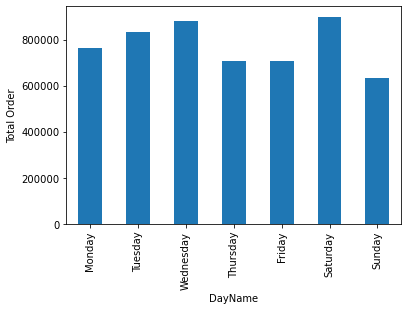

In [76]:
forplot=df.groupby('DayName')['Total Order'].sum().reset_index()
fig = plt.figure(figsize = (10, 10))
field = "DayName"
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ax = forplot.set_index(field).loc[day_order].plot(kind="bar", legend=False)
ax.set_ylabel("Total Order")
plt.show()

Subjectively from the graph above, nope.

In [77]:
from scipy.stats import kruskal

In [78]:
stats,pval=kruskal(
    df[df['DayName']=='Monday']['Total Order'],
    df[df['DayName']=='Tuesday']['Total Order'],
    df[df['DayName']=='Wednesday']['Total Order'],
    df[df['DayName']=='Thursday']['Total Order'],
    df[df['DayName']=='Friday']['Total Order'],
    df[df['DayName']=='Saturday']['Total Order'],
    df[df['DayName']=='Sunday']['Total Order']
)

if pval<=0.05:
    print('Tolak Ho, ada perbedaan total order berdasarkan hari')
else:
    print('Terima Ho, tidak ada perbedaan total order berdasarkan hari')

Terima Ho, tidak ada perbedaan total order berdasarkan hari


More objectively, with statistical analysis, nope.

## Delivery

Now, let's explore the delivery and its distribution.

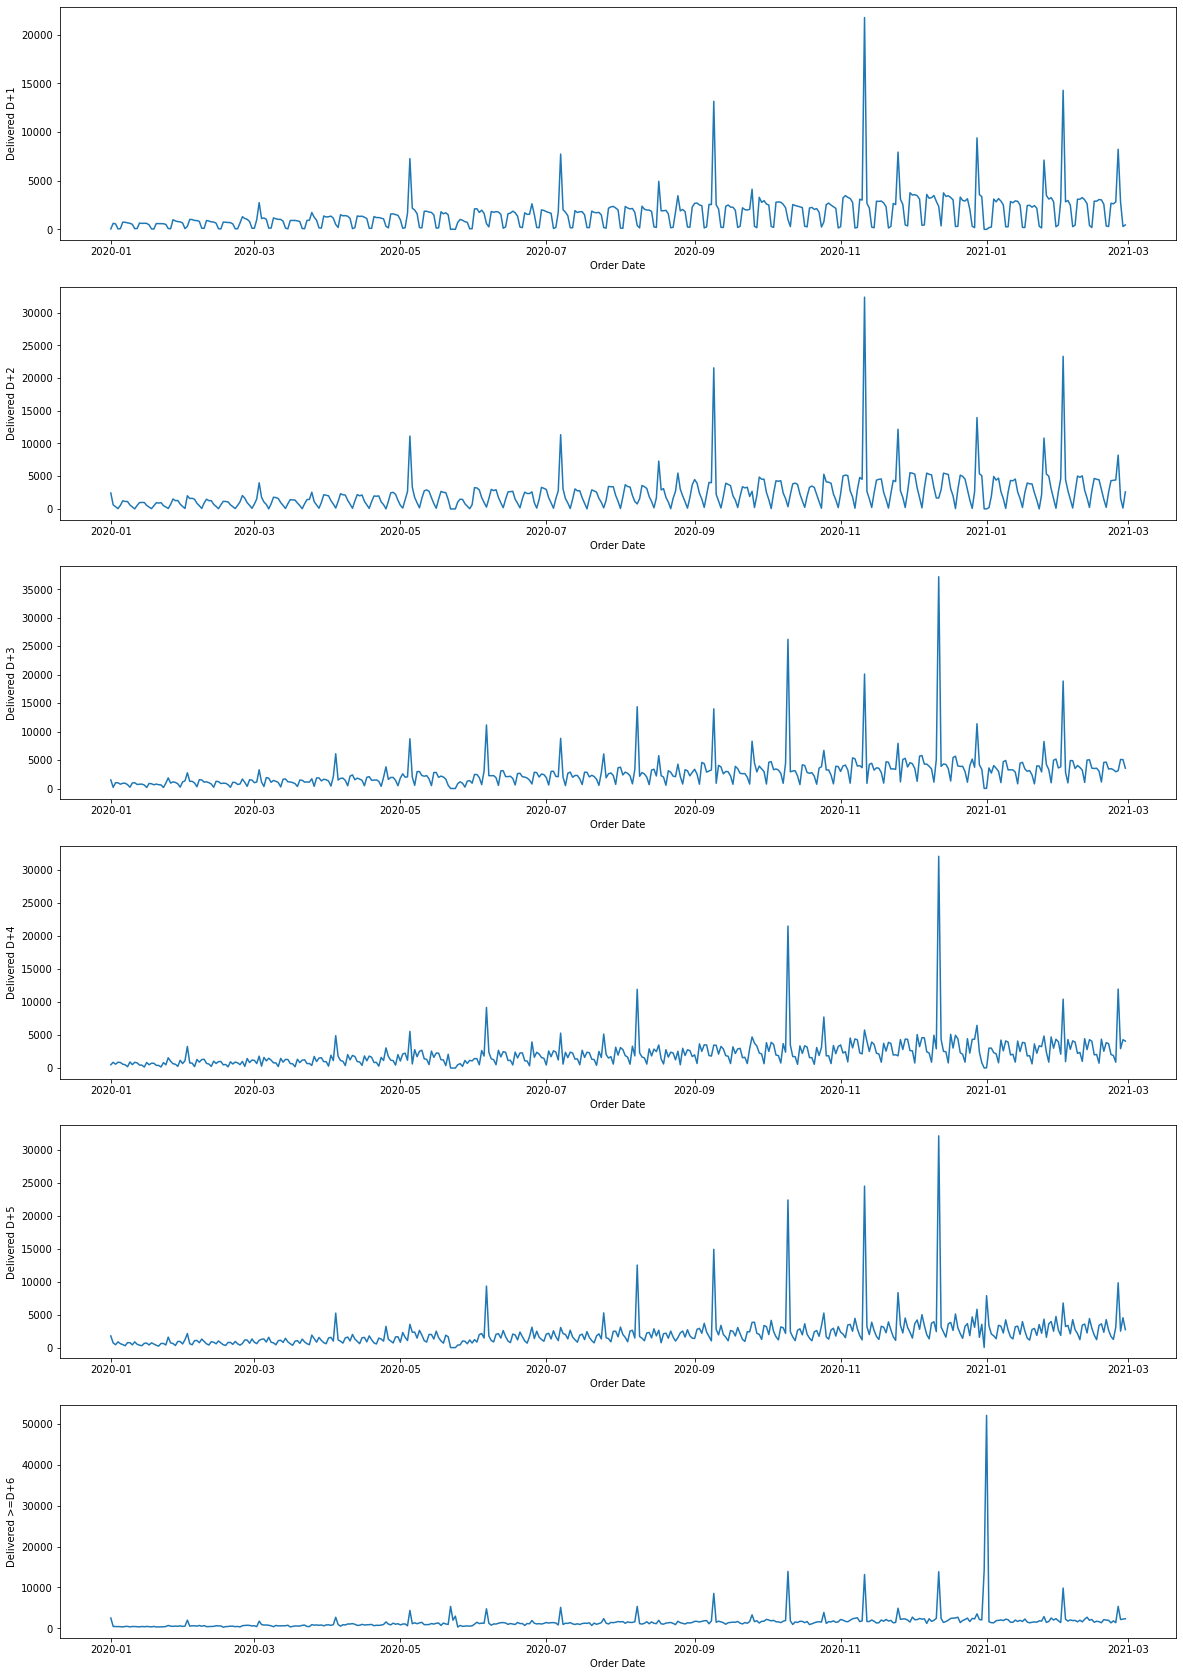

In [79]:
fig = plt.figure(figsize=(20,30))
plt.subplot(611)
sns.lineplot(x='Order Date',y='Delivered D+1', data=df)
plt.subplot(612)
sns.lineplot(x='Order Date',y='Delivered D+2', data=df)
plt.subplot(613)
sns.lineplot(x='Order Date',y='Delivered D+3', data=df)
plt.subplot(614)
sns.lineplot(x='Order Date',y='Delivered D+4', data=df)
plt.subplot(615)
sns.lineplot(x='Order Date',y='Delivered D+5', data=df)
plt.subplot(616)
sns.lineplot(x='Order Date',y='Delivered >=D+6', data=df)

plt.show()

### Distribution

The same with Total Order, I think the distribution won't help much either. However, let's just add it.

#### D+1

<Figure size 576x360 with 0 Axes>

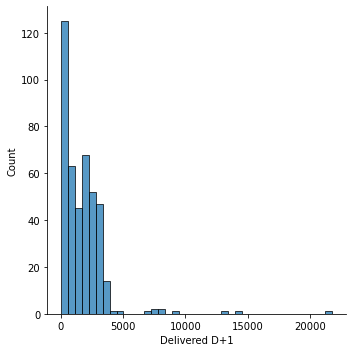

In [80]:
plt.figure(figsize=(8,5))
sns.displot(df['Delivered D+1'])
plt.show()

<Figure size 576x360 with 0 Axes>

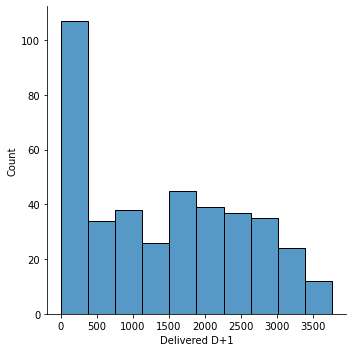

In [81]:
plt.figure(figsize=(8,5))
sns.displot(df[df['Campaign']==0]['Delivered D+1'])
plt.show()

#### D+2

<Figure size 576x360 with 0 Axes>

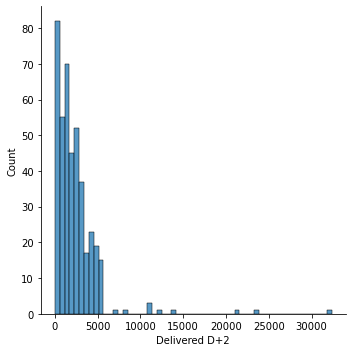

In [82]:
plt.figure(figsize=(8,5))
sns.displot(df['Delivered D+2'])
plt.show()

<Figure size 576x360 with 0 Axes>

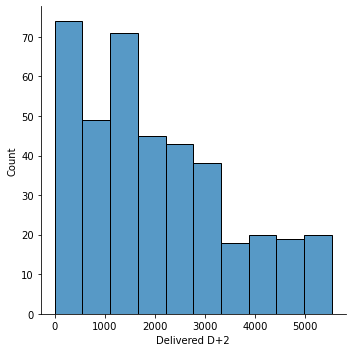

In [83]:
plt.figure(figsize=(8,5))
sns.displot(df[df['Campaign']==0]['Delivered D+2'])
plt.show()

#### D+3

<Figure size 576x360 with 0 Axes>

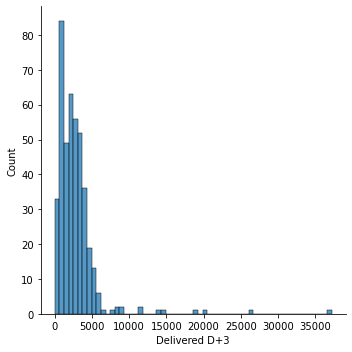

In [84]:
plt.figure(figsize=(8,5))
sns.displot(df['Delivered D+3'])
plt.show()

<Figure size 576x360 with 0 Axes>

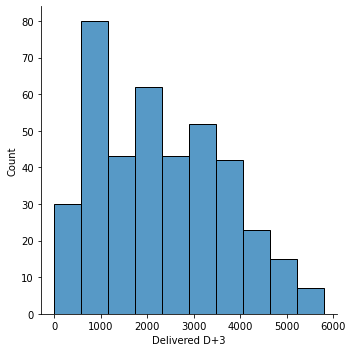

In [85]:
plt.figure(figsize=(8,5))
sns.displot(df[df['Campaign']==0]['Delivered D+3'])
plt.show()

#### D+4

<Figure size 576x360 with 0 Axes>

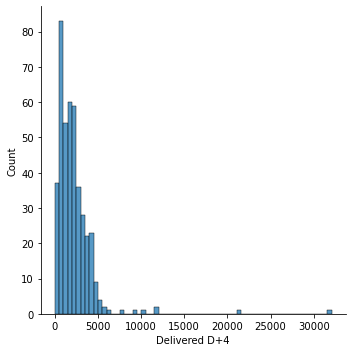

In [86]:
plt.figure(figsize=(8,5))
sns.displot(df['Delivered D+4'])
plt.show()

<Figure size 576x360 with 0 Axes>

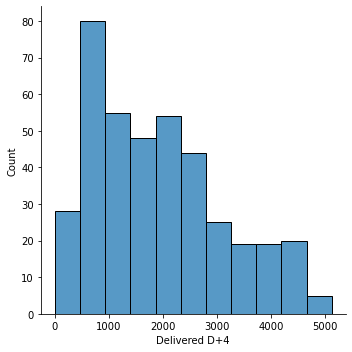

In [87]:
plt.figure(figsize=(8,5))
sns.displot(df[df['Campaign']==0]['Delivered D+4'])
plt.show()

#### D+5

<Figure size 576x360 with 0 Axes>

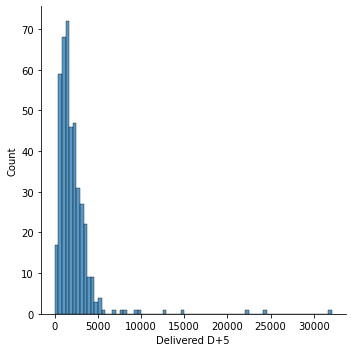

In [88]:
plt.figure(figsize=(8,5))
sns.displot(df['Delivered D+5'])
plt.show()

<Figure size 576x360 with 0 Axes>

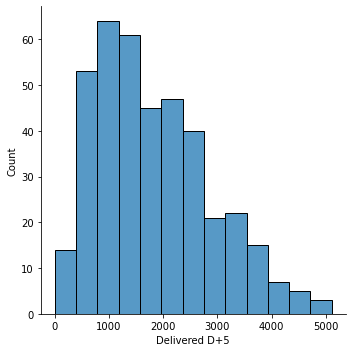

In [89]:
plt.figure(figsize=(8,5))
sns.displot(df[df['Campaign']==0]['Delivered D+5'])
plt.show()

#### >=D+6

<Figure size 576x360 with 0 Axes>

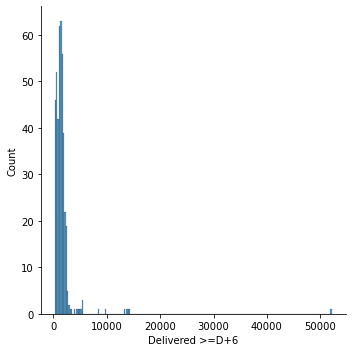

In [90]:
plt.figure(figsize=(8,5))
sns.displot(df['Delivered >=D+6'])
plt.show()

<Figure size 576x360 with 0 Axes>

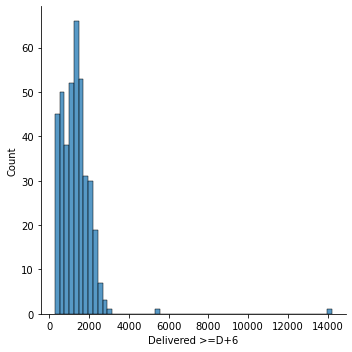

In [91]:
plt.figure(figsize=(8,5))
sns.displot(df[df['Campaign']==0]['Delivered >=D+6'])
plt.show()

In [92]:
df[(df['Delivered >=D+6']>5000)&(df['Campaign']==0)]

Order Date  Total Order  Delivered D+1  Delivered D+2  Delivered D+3  \
142 2020-05-22       5390.0            0.0            0.0            5.0   
365 2020-12-31      14291.0            5.0           13.0           15.0   

     Delivered D+4  Delivered D+5  Delivered >=D+6  Day  Month  ...  \
142           12.0           15.0           5358.0   22      5  ...   
365           23.0           33.0          14202.0   31     12  ...   

     Merdeka Sale  Campaign  New Year  May Day  Lebaran  Natal  Holiday  \
142             0         0         0        0        0      0        0   
365             0         0         0        0        0      0        0   

     Period_of_Month  Weekday   DayName  
142                4        1    Friday  
365                5        1  Thursday  

[2 rows x 23 columns]

<Figure size 576x360 with 0 Axes>

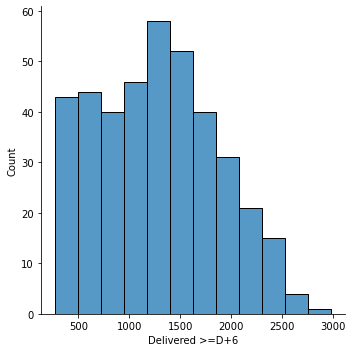

In [93]:
plt.figure(figsize=(8,5))
sns.displot(df[(df['Delivered >=D+6']<=5000)&(df['Campaign']==0)]['Delivered >=D+6'])
plt.show()

Not normally distributed.

#### Overall

In [94]:
df[['Delivered D+1','Delivered D+2', 'Delivered D+3', 'Delivered D+4', 'Delivered D+5', 'Delivered >=D+6']].describe()

Delivered D+1  Delivered D+2  Delivered D+3  Delivered D+4  \
count     425.000000     425.000000     425.000000     425.000000   
mean     1646.275294    2330.061176    2750.065882    2205.136471   
std      1852.515812    2747.987134    2971.261575    2336.868574   
min         0.000000       0.000000       0.000000       3.000000   
25%       320.000000     896.000000    1137.000000     905.000000   
50%      1445.000000    1735.000000    2244.000000    1838.000000   
75%      2442.000000    3060.000000    3470.000000    2817.000000   
max     21769.000000   32359.000000   37219.000000   32089.000000   

       Delivered D+5  Delivered >=D+6  
count     425.000000       425.000000  
mean     2176.228235      1650.341176  
std      2575.777352      2891.854589  
min         5.000000       267.000000  
25%      1023.000000       816.000000  
50%      1658.000000      1341.000000  
75%      2606.000000      1768.000000  
max     32089.000000     52148.000000

In [114]:
df[df['Delivered >=D+6']==df['Delivered >=D+6'].max()]

Order Date  Total Order  Delivered D+1  Delivered D+2  Delivered D+3  \
366 2021-01-01      60120.0            0.0           12.0           34.0   

     Delivered D+4  Delivered D+5  Delivered >=D+6  Day  Month  ...  \
366           50.0         7876.0          52148.0    1      1  ...   

     Merdeka Sale  Campaign  New Year  May Day  Lebaran  Natal  Holiday  \
366             0         1         1        0        0      0        1   

     Period_of_Month  Weekday  DayName  
366                1        1   Friday  

[1 rows x 23 columns]

1. Based on median, most item were delivered in D+3 since the order, followed by D+2, D+4, and D+5. While, D+1 and >=D+6 were the lowest.
2. D+6 and on has the highest max value due to New Year holiday. 

### Patterns using Percentage

I believe that since the delivery distribution is calculated from the total order column, we can't forecast it using it's previous value in the previous day. So, let's check the pattern manually.

In [115]:
df1 = df.copy()

In [116]:
df1['PercentD+1']=(df['Delivered D+1']/df['Total Order'])*100
df1['PercentD+2']=(df['Delivered D+2']/df['Total Order'])*100
df1['PercentD+3']=(df['Delivered D+3']/df['Total Order'])*100
df1['PercentD+4']=(df['Delivered D+4']/df['Total Order'])*100
df1['PercentD+5']=(df['Delivered D+5']/df['Total Order'])*100
df1['PercentD6+']=(df['Delivered >=D+6']/df['Total Order'])*100
df2=df1[df1['Campaign']==1]
df3=df1[df1['Campaign']==0]

#### Campaign

<AxesSubplot:>

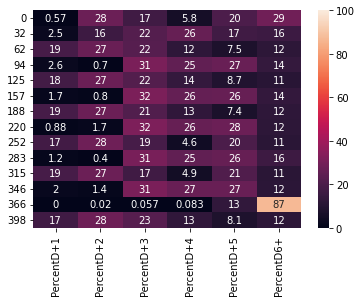

In [117]:
for_plot=df2[(df2['Double-Double Campaign']==1)][['Order Date','PercentD+1','PercentD+2','PercentD+3','PercentD+4','PercentD+5','PercentD6+']]
sns.heatmap(for_plot.drop(columns=['Order Date']), annot=True, vmin=0, vmax=100)

In [118]:
# 2020:
# 1:  00 28 17 06 20 29
# 2:  03 16 22 26 17 16  
# Jan and Feb 2020 didn't have a delivery strategy formula

# The strategy was implemented in March:
# 3:  19 27 22 12 08 12  
# 5:  18 27 21 13 09 11  
# 7:  19 27 21 13 08 12  
# where order on Double-Double Campaign in odds months will have a percentage formula above

# 4:  03 00 31 25 27 14  
# 6:  01 00 32 26 26 14  
# 8:  01 02 32 26 28 12  
# 10: 01 00 31 25 26 16  
# 12: 02 01 31 27 27 12  
# while the even months will have percentage formula above

# 9:  17 28 19 05 20 11  
# 11: 19 28 17 05 21 11  
# In September and November, there were a shift in D+4 and D+5 delivery proportion

# 2021:
# 1:  00 00 00 00 13 87  
# Holiday, thus the delivery started on D+5

# 2:  17 28 23 13 08 12  
# In 2021, it seems that there will be a formula switch on odd and even months

# So, for delivery projection of March 2021 on DDC day will follow the formula:
# x=Total Order
# (100%)x = (1-3%)x + (0-2%)x + (31-32%)x + (25-27%)x + (26-28%)x + (12-16%)x
# We will use the mean for later projection, the formula above just for brief intro

<AxesSubplot:>

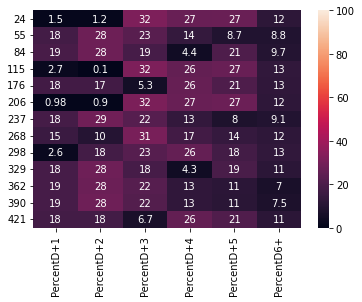

In [119]:
for_plot=df2[(df2['Gajian Sale']==1)][['Order Date','PercentD+1','PercentD+2','PercentD+3','PercentD+4','PercentD+5','PercentD6+']]
sns.heatmap(for_plot.drop(columns=['Order Date']), annot=True, vmin=0, vmax=100)

In [120]:
# 1: 0-10; 2: 11-20; 3: 21-30; 4: 31-40; and so on
# 1:  1 1 4 3 3 2
# 2:  2 3 3 2 1 1
                                                                    # 3:  2 3 2 1 3 1
# 4:  1 1 4 3 3 2
# 5:  Nan
                        # 6:  2 2 1 3 3 2
# 7:  1 1 4 3 3 2
# 8:  2 3 3 2 1 1
                                                                                            # 9:  2 1 4 2 2 2
                                                                                            # 10: 1 2 3 3 2 2
                                                                    # 11: 2 3 2 1 2 2
                                                # 12: 2 3 3 2 2 1
                                                # 1:  2 3 3 2 2 1
                        # 2:  2 2 1 3 3 2
                        
# In 2020, we see a pattern of delivery. Month 1 and 2 are the same, followed by random distribution in month 3. Repeat.
# The pattern diseappear in month 10 and 11. And reappear in month 12.
# Based on the assumption that month 12-2020 and 1-2021 are the same, followed by random distribution on Feb 2021, 
# we can say that March 2021 will follow the delivery distribution on 12-2020 or 1-2021:
# x=Total Order
# (100%)x = (19%)x + (28%)x + (22%)x + (13%)x + (11%)x + (7%)x

#### Non-campaign

<AxesSubplot:ylabel='Year-Month-Day'>

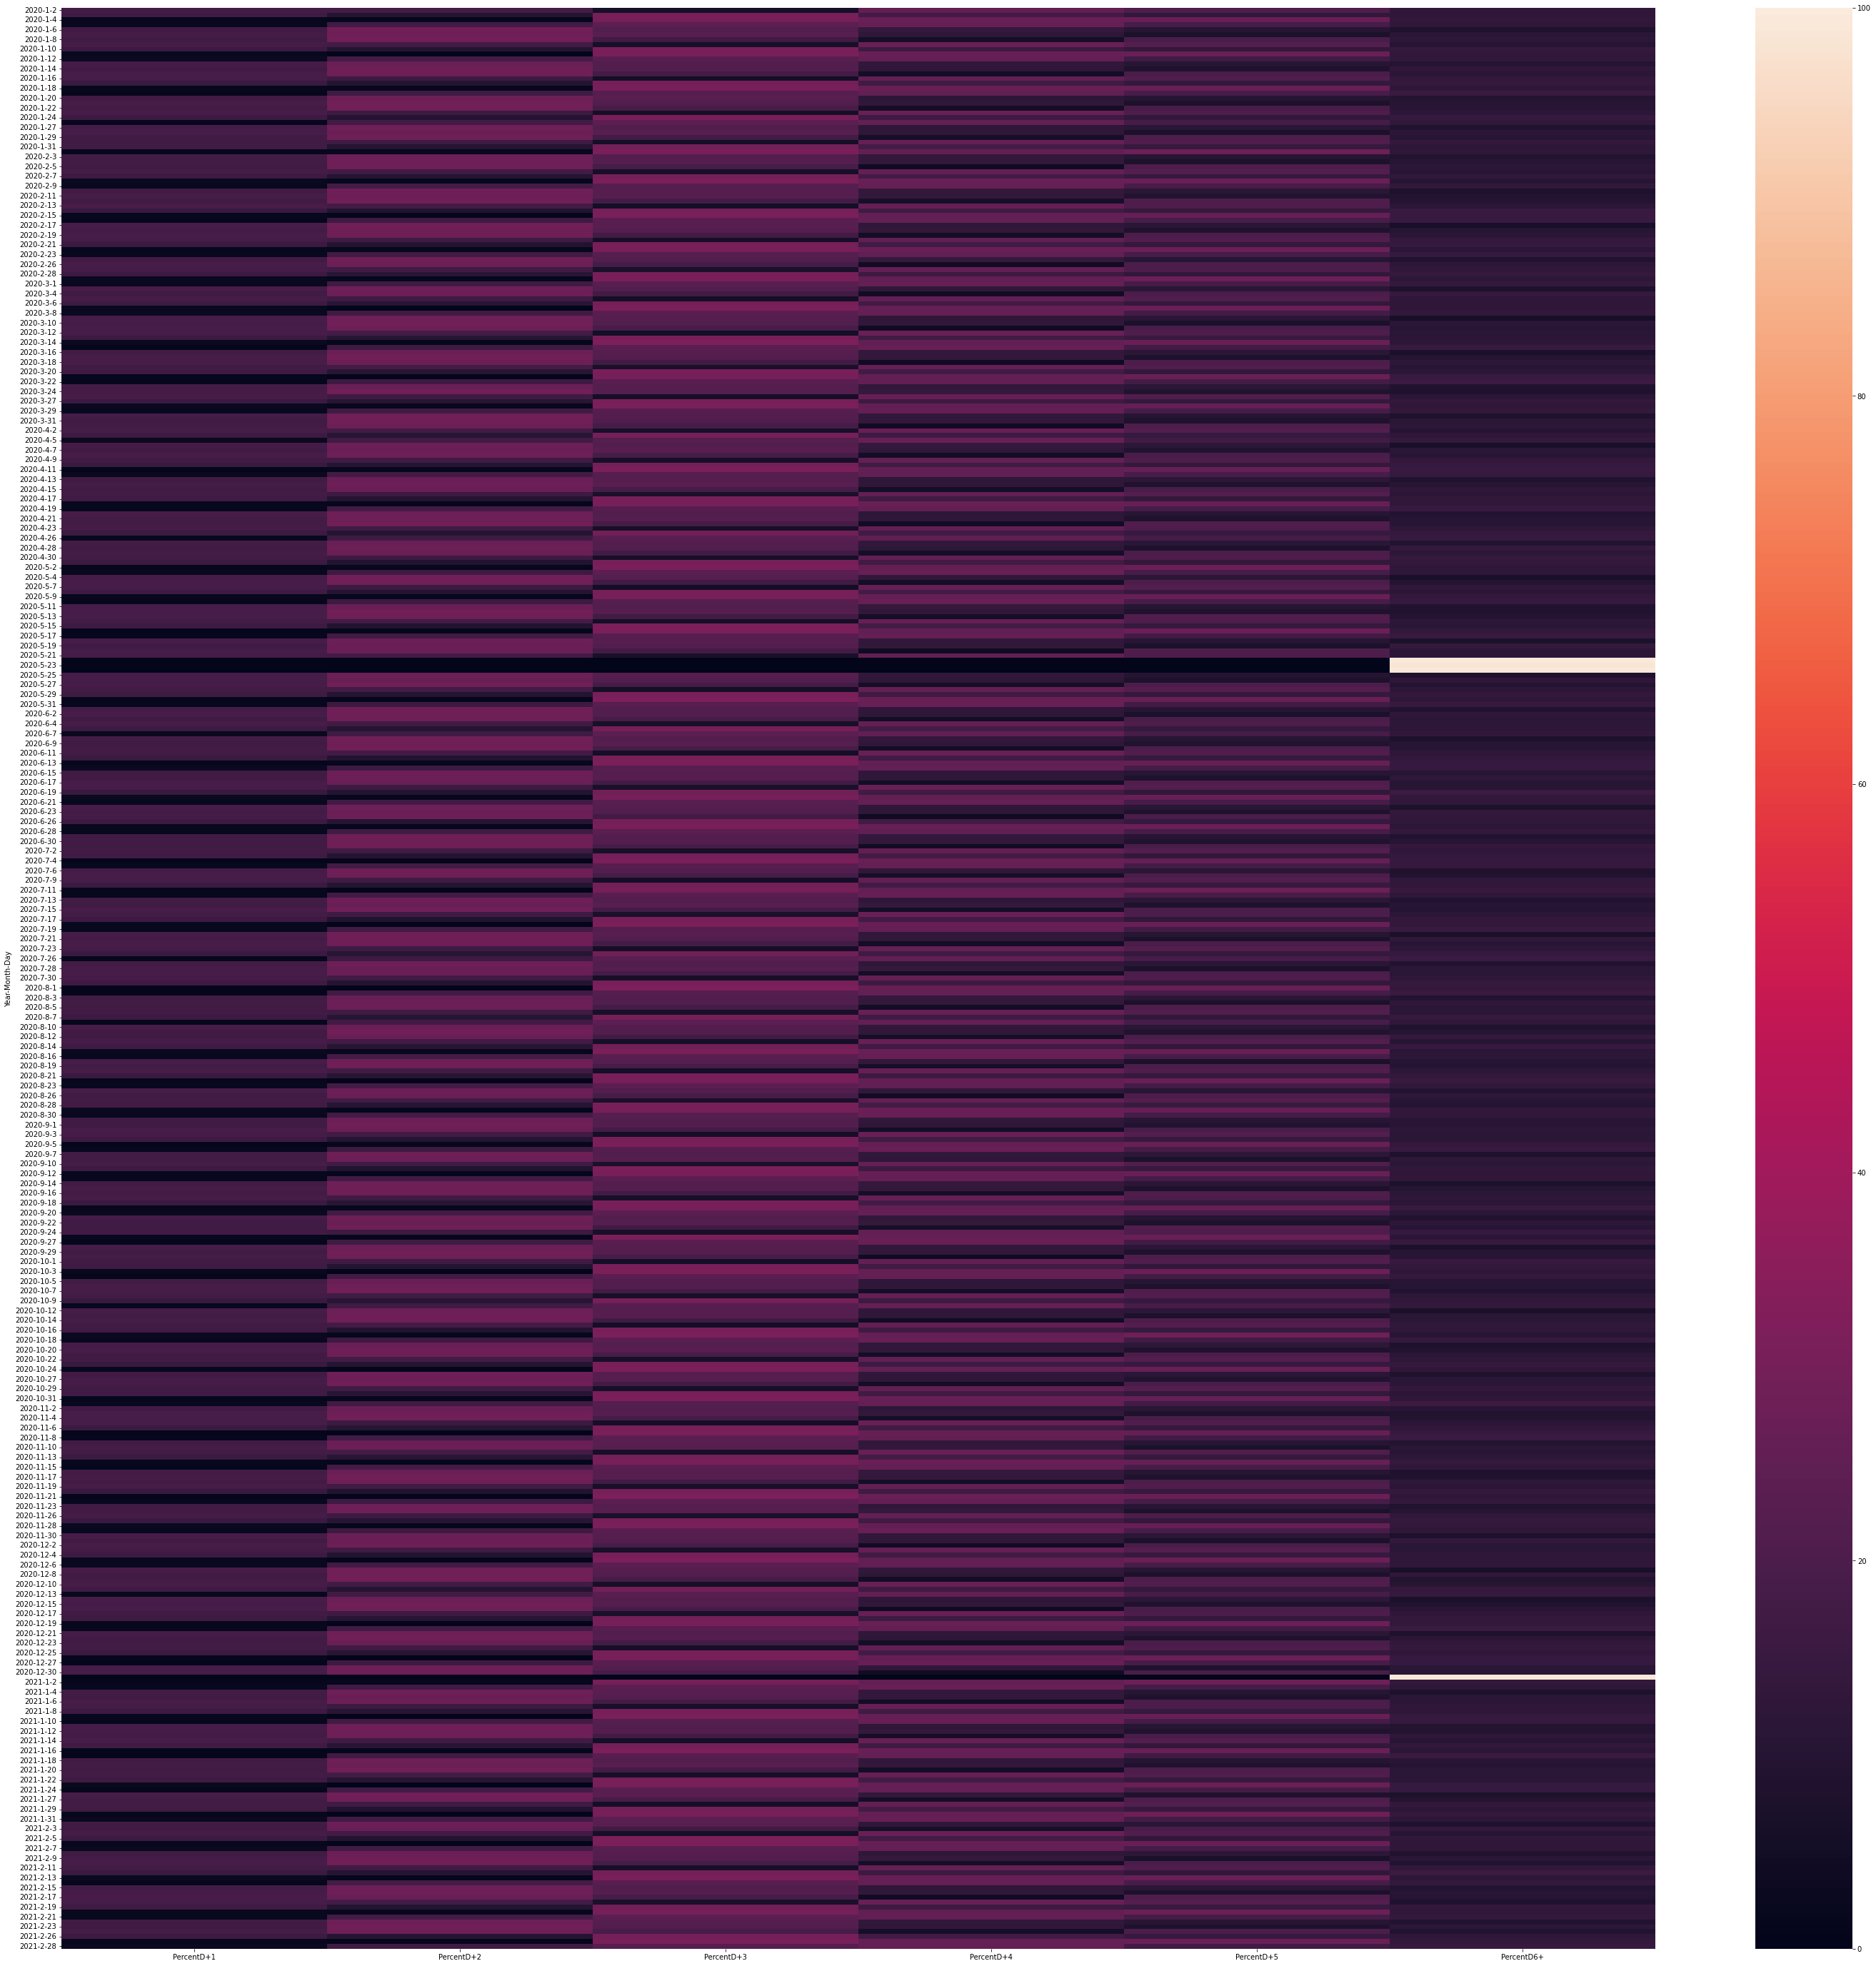

In [121]:
# Overall
plt.figure(figsize=(50,50))
for_plot=df3.groupby(['Year','Month','Day'])[['PercentD+1','PercentD+2','PercentD+3','PercentD+4','PercentD+5','PercentD6+']].median()
sns.heatmap(for_plot, vmin=0, vmax=100)

<AxesSubplot:ylabel='Year-Month-Day'>

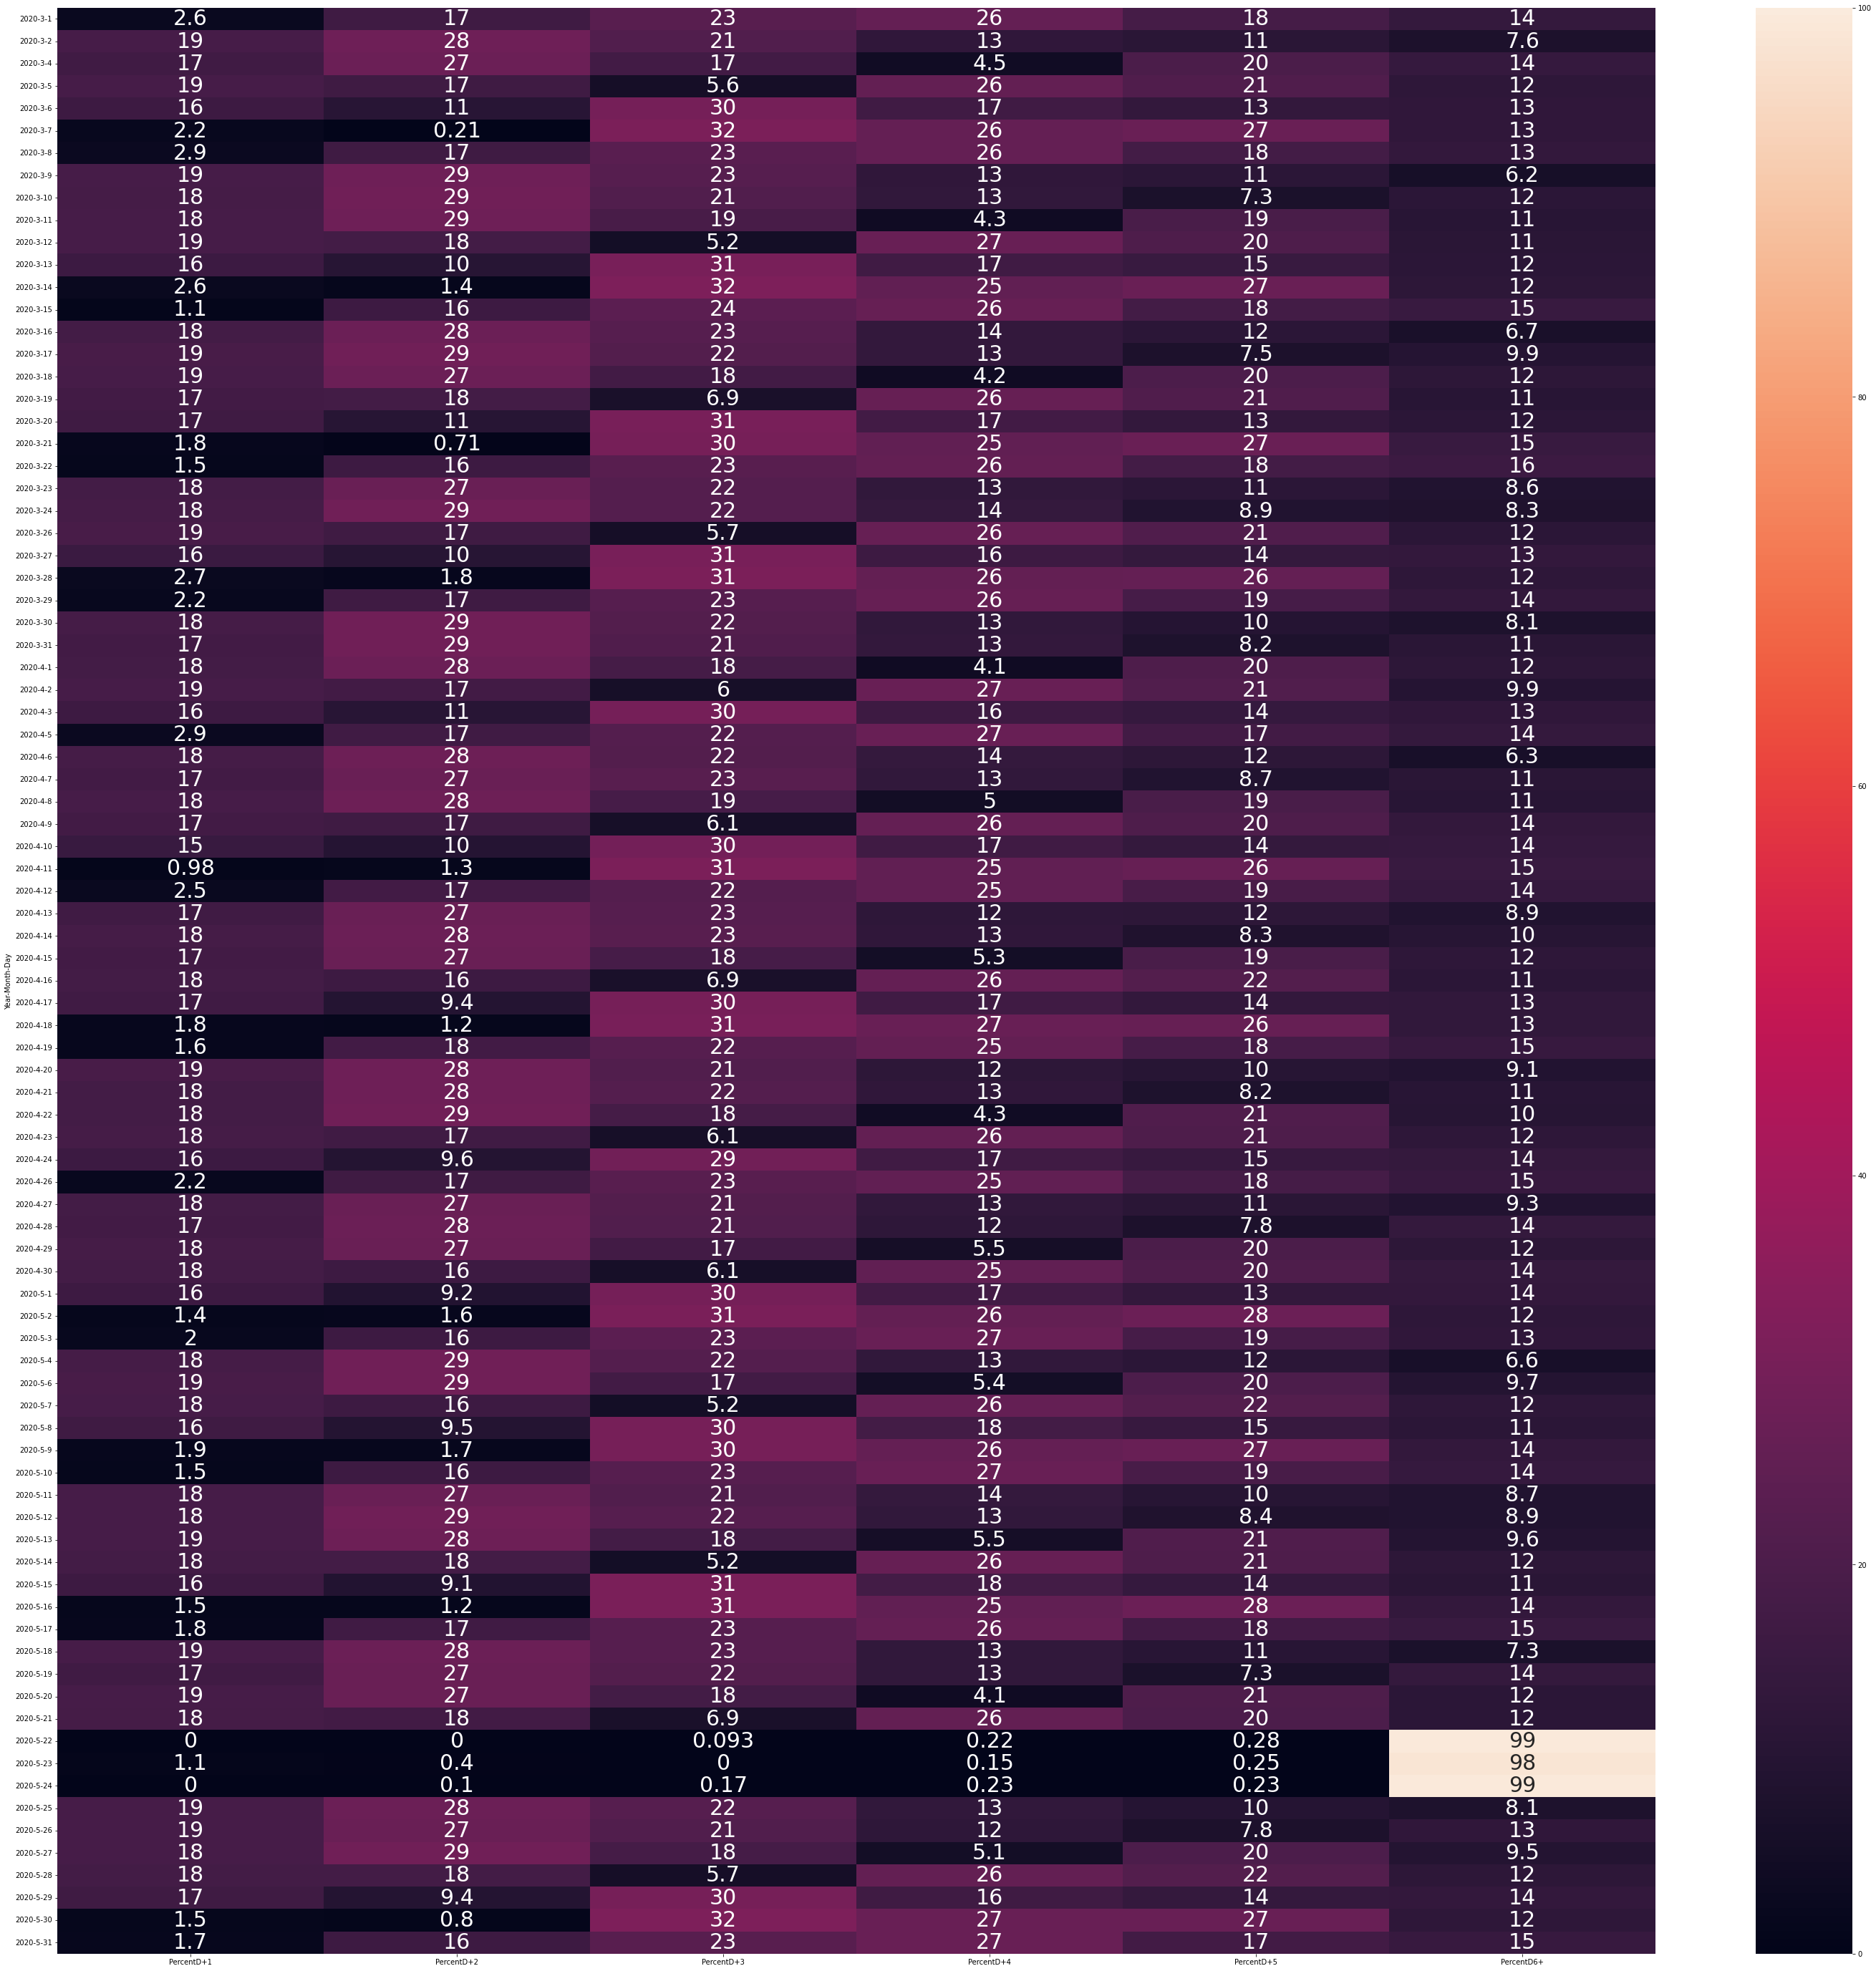

In [122]:
# Feb, March, April
# To make sure that the pattern is maintain throughout the time series
plt.figure(figsize=(50,50))
for_plot=df3[(df3['Year']==2020)&((df3['Month']==3)|(df3['Month']==4)|(df3['Month']==5))].groupby(['Year','Month','Day'])[['PercentD+1','PercentD+2','PercentD+3','PercentD+4','PercentD+5','PercentD6+']].median()
sns.heatmap(for_plot, annot=True, vmin=0, vmax=100, annot_kws={"fontsize":30})

<AxesSubplot:ylabel='Year-Month-Day'>

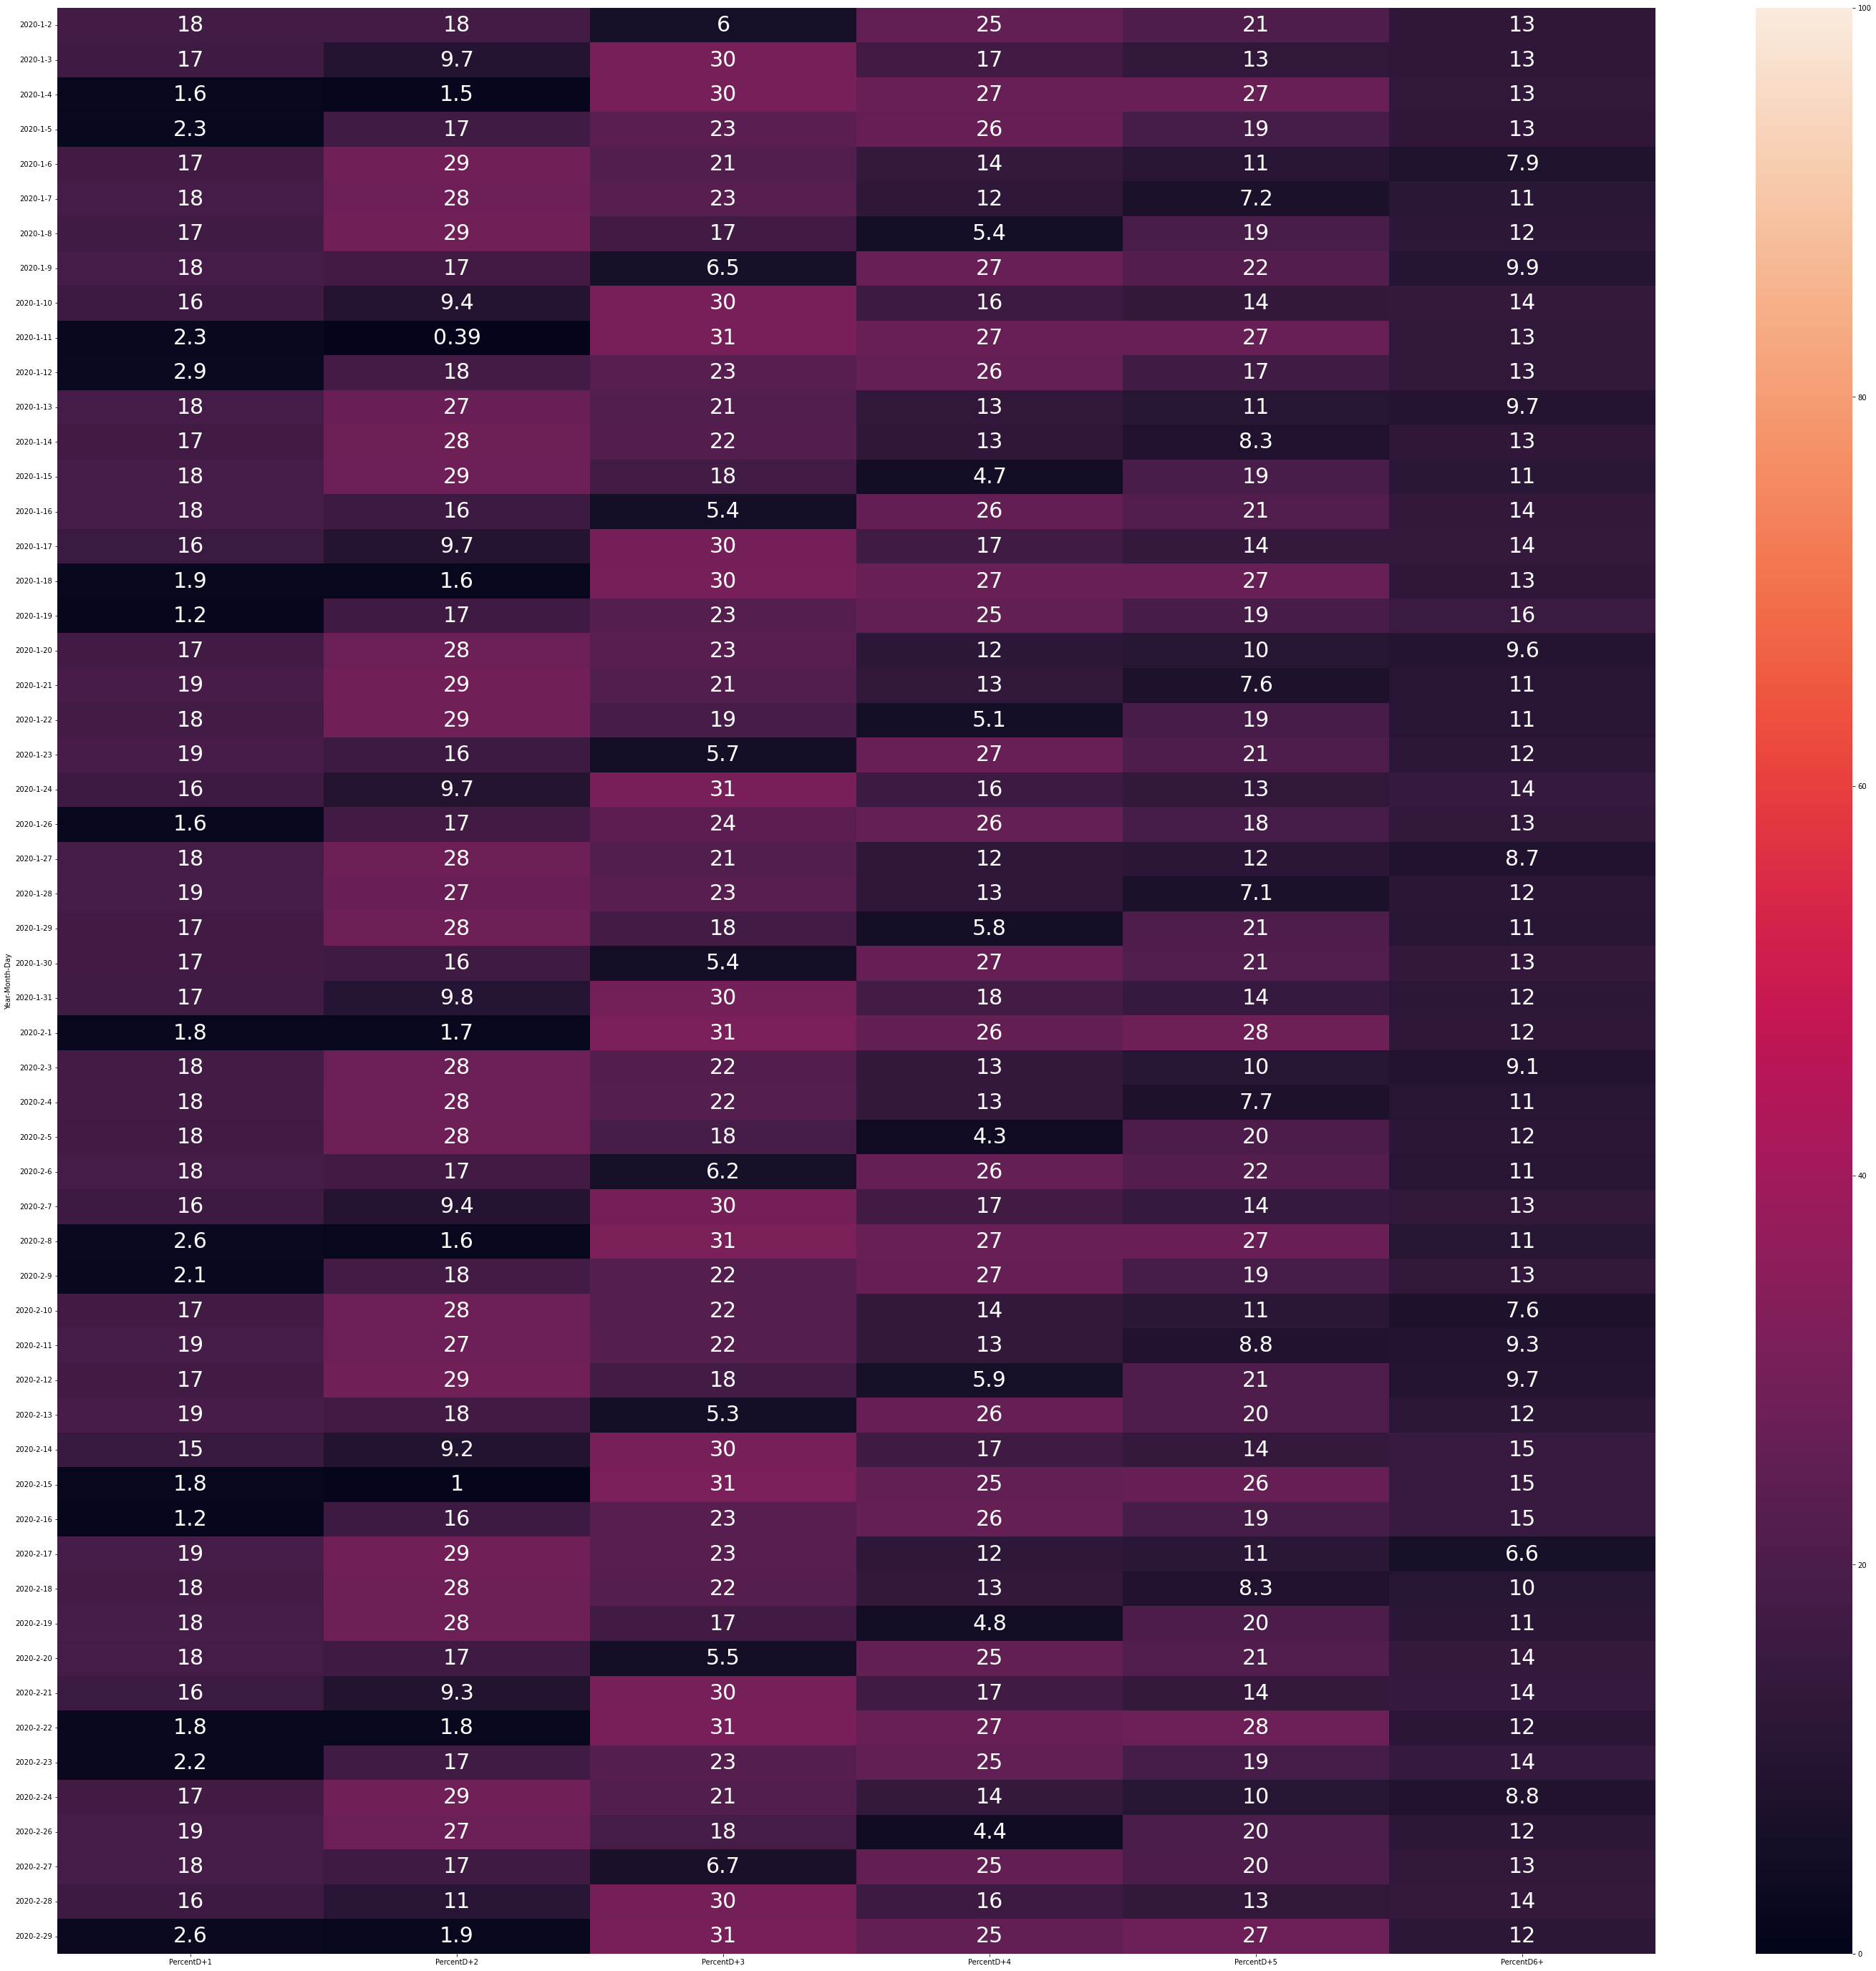

In [123]:
# Jan, Feb 2020 vs Jan, Feb 2021
plt.figure(figsize=(50,50))
for_plot=df3[(df3['Year']==2020)&((df3['Month']==1)|(df3['Month']==2))].groupby(['Year','Month','Day'])[['PercentD+1','PercentD+2','PercentD+3','PercentD+4','PercentD+5','PercentD6+']].median()
sns.heatmap(for_plot, annot=True, vmin=0, vmax=100, annot_kws={"fontsize":30})

<AxesSubplot:ylabel='Year-Month-Day'>

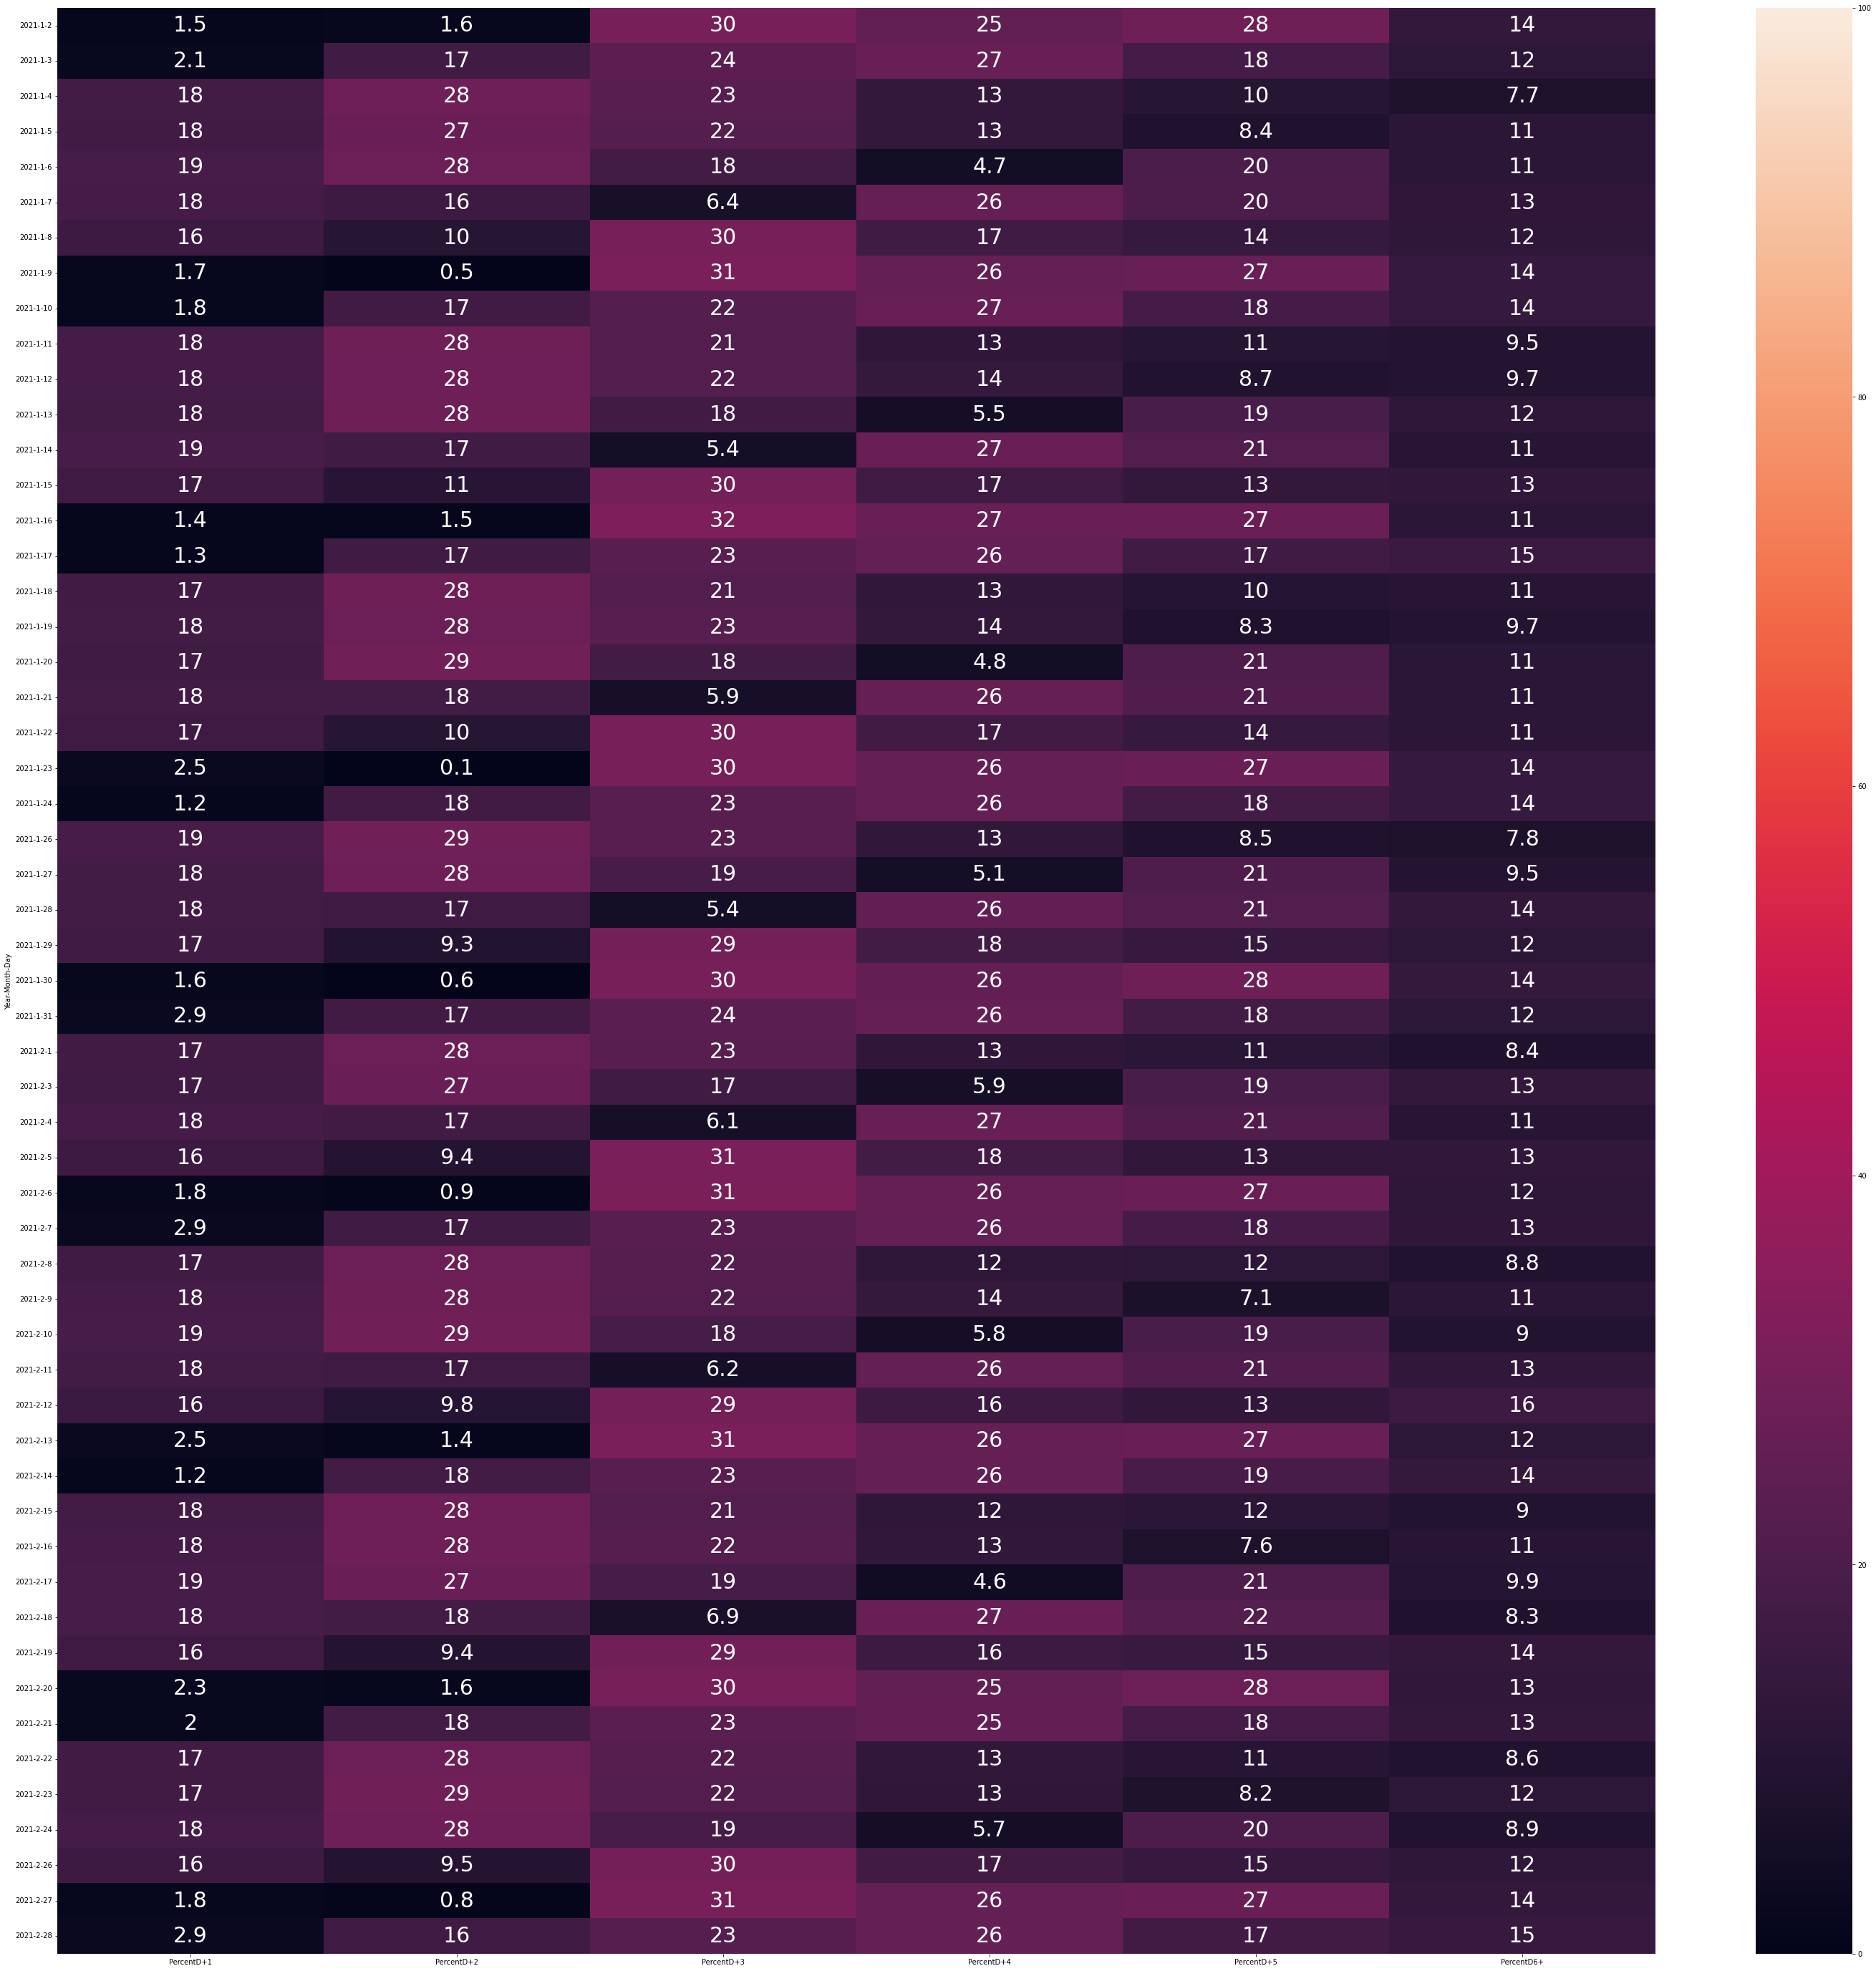

In [124]:
plt.figure(figsize=(50,50))
for_plot=df3[(df3['Year']==2021)&((df3['Month']==1)|(df3['Month']==2))].groupby(['Year','Month','Day'])[['PercentD+1','PercentD+2','PercentD+3','PercentD+4','PercentD+5','PercentD6+']].median()
sns.heatmap(for_plot, annot=True, vmin=0, vmax=100, annot_kws={"fontsize":30})

There are repeated patterns based on heatmaps above. Also, it can be seen that the low percentage of delivery on D+1 were located at Saturday or Sunday. So, D+1 were Sunday or Monday. My best guess is that the delivery percentage of D+1 to D+5 were affected by day. Let's check it out.

In [125]:
df3.groupby('DayName')[['PercentD+1','PercentD+2','PercentD+3','PercentD+4','PercentD+5','PercentD6+']].mean().reindex(['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday','Saturday','Sunday'])

PercentD+1  PercentD+2  PercentD+3  PercentD+4  PercentD+5  \
DayName                                                                 
Monday      17.927915   27.937247   21.884294   12.941896   10.989380   
Tuesday     17.933580   28.029847   22.018760   13.050936    7.955998   
Wednesday   18.044586   28.034841   17.999422    4.951517   19.919456   
Thursday    17.731545   16.638311    5.949978   25.606311   20.589538   
Friday      15.761062    9.691658   29.593634   16.657447   13.737437   
Saturday     1.831254    1.152266   30.360813   25.533313   26.458847   
Sunday       1.949153   16.668120   22.661560   25.579728   17.847588   

           PercentD6+  
DayName                
Monday       8.319269  
Tuesday     11.010879  
Wednesday   11.050178  
Thursday    13.484316  
Friday      14.558762  
Saturday    14.663507  
Sunday      15.293850

Let's say that the order came on Monday, because of 5 day after Monday is still workday, the proportion of item delivered were still high throughout D+1 to D+5. Different than Tuesday that includes Sunday on D+5, the proportion was expectedly low in D+5. However, we can saw that there was a delay in order that came on Saturday, that's probably because the system needs to process the order. For example, the order came on Sunday, the processing takes 1 workday on Monday; when the order came on Saturday, the process will also takes 1 workday on Monday. 

## Total Order and Delivery

Let's check further for the connection between these two. Maybe we can find another useful information.

In [126]:
df1[df1['PercentD6+']>30][['Order Date','Total Order','PercentD+1','PercentD+2','PercentD+3','PercentD+4','PercentD+5','PercentD6+']]

Order Date  Total Order  PercentD+1  PercentD+2  PercentD+3  PercentD+4  \
142 2020-05-22       5390.0    0.000000    0.000000    0.092764    0.222635   
143 2020-05-23       2024.0    1.086957    0.395257    0.000000    0.148221   
144 2020-05-24       3003.0    0.000000    0.099900    0.166500    0.233100   
365 2020-12-31      14291.0    0.034987    0.090966    0.104961    0.160940   
366 2021-01-01      60120.0    0.000000    0.019960    0.056554    0.083167   

     PercentD+5  PercentD6+  
142    0.278293   99.406308  
143    0.247036   98.122530  
144    0.233100   99.267399  
365    0.230915   99.377230  
366   13.100466   86.739854

The decline in total order in Lebaran and New Year holidays probably caused by the customer prefer for their items delivered faster. If they made a purchase in those dates, it is most likely that their items will be delivered in >=D+6.

Visualizing the May 2020 total order.

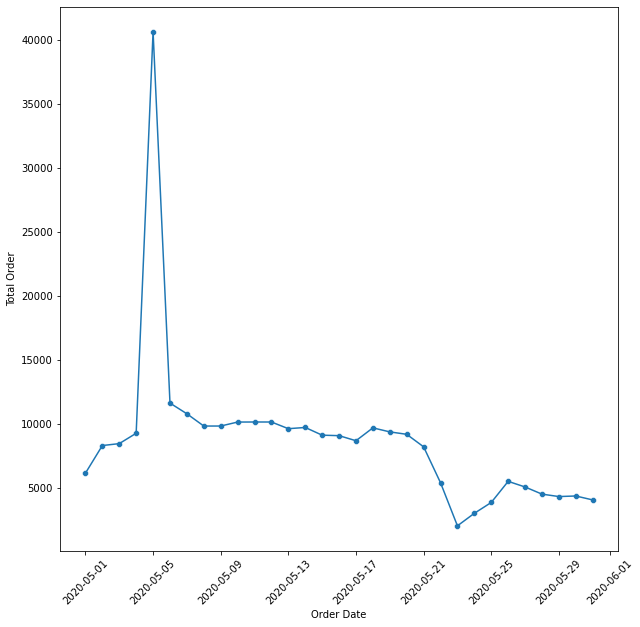

In [127]:
for_plot=df[(df['Year']==2020)&(df['Month']==5)]
plt.figure(figsize=(10,10))
sns.scatterplot(x='Order Date', y='Total Order', data=for_plot)
sns.lineplot(x='Order Date', y='Total Order', data=for_plot)
plt.xticks(rotation=45)
plt.show()

Visualizing the total order of Dec 2020 and Jan 2021.

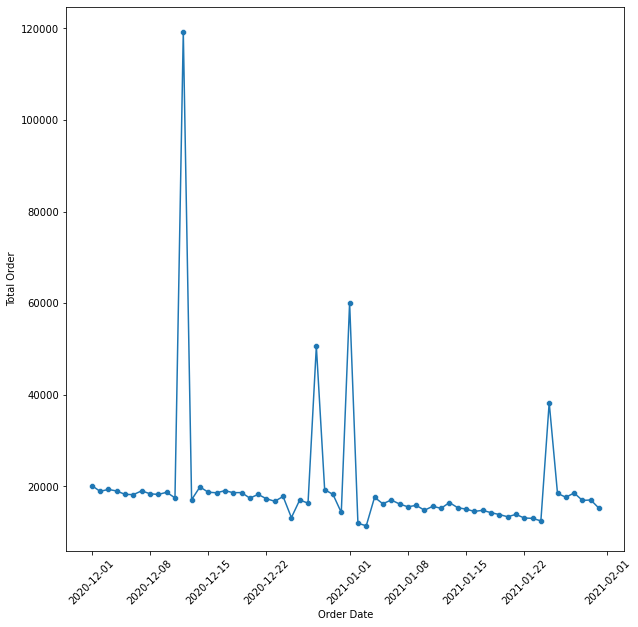

In [128]:
for_plot=df[(((df['Year']==2020)&(df['Month']==12))|((df['Year']==2021)&(df['Month']==1)))]
plt.figure(figsize=(10,10))
sns.scatterplot(x='Order Date', y='Total Order', data=for_plot)
sns.lineplot(x='Order Date', y='Total Order', data=for_plot)
plt.xticks(rotation=45)
plt.show()

Let's exclude the campaign.

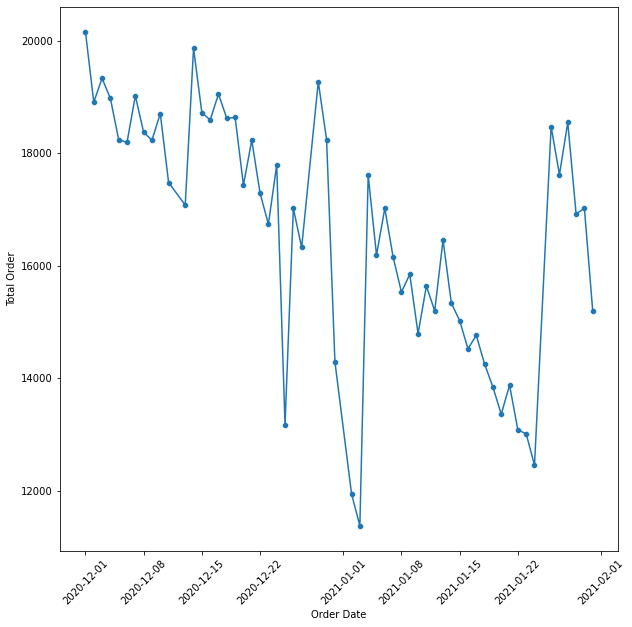

In [129]:
for_plot=df[(df['Campaign']==0)&(((df['Year']==2020)&(df['Month']==12))|((df['Year']==2021)&(df['Month']==1)))]
plt.figure(figsize=(10,10))
sns.scatterplot(x='Order Date', y='Total Order', data=for_plot)
sns.lineplot(x='Order Date', y='Total Order', data=for_plot)
plt.xticks(rotation=45)
plt.show()

However, the effect didn't occur on Jan 1st due to occurrence of DD campaign. So, now we know that the customer prioritize discount more than delivery day. It is surely a nice information to have when planning a campaign.

# Total Order of March 2021

## Defining Seasonality of the Total Order

After a detailed EDA, we know that the trend of total order was seasonal with certain events (campaign and holiday). Some insights we gained from EDA were:
1. There were multiplication of total order on campaign dates by month throughout the year. 
2. Lower total order on holiday dates.
3. Total order of non campaign decreased with the increase in time (day of month), replenished/increased again on Gajian Sales for each month. Repeated throughout the year.
4. On month 1-6, there were increase of total order in period 2 from period 1 of each month. While, on month 7-12, vice versa.
5. Decrease in total order in January 2021 from December 2020, but increased again in February 2021 (except period 5). This indicates a yearly seasonality.

Thus, our options for projecting the total order in March 2021 are using SARIMAX and/or FB-PROPHET. Due to limited time, I will only use PROPHET.

[Reference](https://facebook.github.io/prophet/docs/quick_start.html)
[Reference Installation](https://medium.com/data-folks-indonesia/installing-fbprophet-prophet-for-time-series-forecasting-in-jupyter-notebook-7de6db09f93e)
[Reference Parameter](https://www.sktime.org/en/v0.6.0/api_reference/modules/auto_generated/sktime.forecasting.fbprophet.Prophet.html)

## Load library and data needed

In [130]:
from prophet import Prophet

In [131]:
df_prophet = df[['Order Date','Total Order']]
df_prophet.tail()

Order Date  Total Order
420 2021-02-24      15590.0
421 2021-02-25      46771.0
422 2021-02-26      17134.0
423 2021-02-27      16620.0
424 2021-02-28      15789.0

In [132]:
len(df_prophet)

425

In [133]:
df_prophet=df_prophet.rename(columns={'Order Date':'ds','Total Order':'y'})

## Define Campaign Days and Holidays

In [134]:
DDC = pd.DataFrame({
  'holiday': 'Double-Double Campaign',
  'ds': pd.to_datetime(['2020-01-01', '2020-02-02', '2020-03-03',
                        '2020-04-04', '2020-06-06',
                        '2020-07-07', '2020-08-08', '2020-09-09',
                        '2020-10-10', '2020-11-11', '2020-12-12',
                        '2021-01-01', '2021-02-02', '2021-03-03', 
                        '2021-04-04', '2021-06-06',
                        '2021-07-07', '2021-08-08', '2021-09-09',
                        '2021-10-10', '2021-11-11', '2021-12-12']),
  'lower_window': 0,
  'upper_window': 1,
})

Lebaran = pd.DataFrame({
  'holiday': 'Lebaran Campaign',
  'ds': pd.to_datetime(['2020-05-05','2021-05-05']),
  'lower_window': 0,
  'upper_window': 1,
})


Gajian = pd.DataFrame({
  'holiday': 'Gajian Campaign',
  'ds': pd.to_datetime(['2020-01-25', '2020-02-25', '2020-03-25',
                        '2020-04-25', '2020-06-25',
                        '2020-07-25', '2020-08-25', '2020-09-25',
                        '2020-10-25', '2020-11-25', '2020-12-28',
                        '2021-01-25', '2021-02-25', '2021-03-25', 
                        '2021-04-25', '2020-06-25',
                        '2020-07-25', '2020-08-25', '2020-09-25',
                        '2020-10-25', '2020-11-25', '2020-12-28']),
  'lower_window': 0,
  'upper_window': 1,
})

Merdeka = pd.DataFrame({
  'holiday': 'Merdeka Campaign',
  'ds': pd.to_datetime(['2020-08-17','2021-08-17']),
  'lower_window': 0,
  'upper_window': 1,
})

Liburan = pd.DataFrame({
  'holiday': 'Liburan',
  'ds': pd.to_datetime(['2020-01-01', '2020-05-01', '2020-05-22',
                        '2020-05-23', '2020-05-24', '2020-12-25', 
                        '2020-12-31', 
                        '2021-01-01', '2021-05-01', '2021-05-22',
                        '2021-05-23', '2021-05-24', '2021-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})

CaHoDay = pd.concat((DDC, Gajian, Merdeka, Liburan, Lebaran))
CaHoDay

holiday         ds  lower_window  upper_window
0   Double-Double Campaign 2020-01-01             0             1
1   Double-Double Campaign 2020-02-02             0             1
2   Double-Double Campaign 2020-03-03             0             1
3   Double-Double Campaign 2020-04-04             0             1
4   Double-Double Campaign 2020-06-06             0             1
5   Double-Double Campaign 2020-07-07             0             1
6   Double-Double Campaign 2020-08-08             0             1
7   Double-Double Campaign 2020-09-09             0             1
8   Double-Double Campaign 2020-10-10             0             1
9   Double-Double Campaign 2020-11-11             0             1
10  Double-Double Campaign 2020-12-12             0             1
11  Double-Double Campaign 2021-01-01             0             1
12  Double-Double Campaign 2021-02-02             0             1
13  Double-Double Campaign 2021-03-03             0             1
14  Double-Double Campaign 2021-04-04             0             1
15  Double-Double Campaign 2021-06-06             0             1
16  Double-Double Campaign 2021-07-07             0             1
17  Double-Double Campaign 2021-08-08             0             1
18  Double-Double Campaign 2021-09-09             0             1
19  Double-Double Campaign 2021-10-10             0             1
20  Double-Double Campaign 2021-11-11             0             1
21  Double-Double Campaign 2021-12-12             0             1
0          Gajian Campaign 2020-01-25             0             1
1          Gajian Campaign 2020-02-25             0             1
2          Gajian Campaign 2020-03-25             0             1
3          Gajian Campaign 2020-04-25             0             1
4          Gajian Campaign 2020-06-25             0             1
5          Gajian Campaign 2020-07-25             0             1
6          Gajian Campaign 2020-08-25             0             1
7          Gajian Campaign 2020-09-25             0             1
8          Gajian Campaign 2020-10-25             0             1
9          Gajian Campaign 2020-11-25             0             1
10         Gajian Campaign 2020-12-28             0             1
11         Gajian Campaign 2021-01-25             0             1
12         Gajian Campaign 2021-02-25             0             1
13         Gajian Campaign 2021-03-25             0             1
14         Gajian Campaign 2021-04-25             0             1
15         Gajian Campaign 2020-06-25             0             1
16         Gajian Campaign 2020-07-25             0             1
17         Gajian Campaign 2020-08-25             0             1
18         Gajian Campaign 2020-09-25             0             1
19         Gajian Campaign 2020-10-25             0             1
20         Gajian Campaign 2020-11-25             0             1
21         Gajian Campaign 2020-12-28             0             1
0         Merdeka Campaign 2020-08-17             0             1
1         Merdeka Campaign 2021-08-17             0             1
0                  Liburan 2020-01-01             0             1
1                  Liburan 2020-05-01             0             1
2                  Liburan 2020-05-22             0             1
3                  Liburan 2020-05-23             0             1
4                  Liburan 2020-05-24             0             1
5                  Liburan 2020-12-25             0             1
6                  Liburan 2020-12-31             0             1
7                  Liburan 2021-01-01             0             1
8                  Liburan 2021-05-01             0             1
9                  Liburan 2021-05-22             0             1
10                 Liburan 2021-05-23             0             1
11                 Liburan 2021-05-24             0             1
12                 Liburan 2021-12-25             0             1
0         Lebaran Campaign 2020-05-05             0        

## Model Building

In [135]:
# Base model with campaign and holidays, with multiplicative yearly 
m = Prophet(holidays=CaHoDay,weekly_seasonality=False,seasonality_mode='multiplicative',yearly_seasonality=True, changepoint_range=0.9) # Campaign and Holiday
# Add seasonality
m.add_seasonality(name='monthly', period=30, fourier_order=5, mode='multiplicative')
# Fit the model to df_prophet
m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Due to yearly seasonality, it's best to use changepoint_range to 0.9 so it captures the data from January 2020 to early Feb 2021 as a training data where it detects the changepoints. Using the default, 0.8 will only captures data up till the decline in January 2021, thus most likely that the forecast will resulting in declining pattern of total order.

In [136]:
future = m.make_future_dataframe(periods=90)
future.tail()

ds
510 2021-05-25
511 2021-05-26
512 2021-05-27
513 2021-05-28
514 2021-05-29

In [137]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
510 2021-05-25  13143.141720   7058.782599  19127.817564
511 2021-05-26  20654.225122  10962.468767  29881.012009
512 2021-05-27  20483.124015  11178.232993  29573.522271
513 2021-05-28  19976.783766  10678.141970  29192.010603
514 2021-05-29  19513.568026  10392.912840  28552.095942

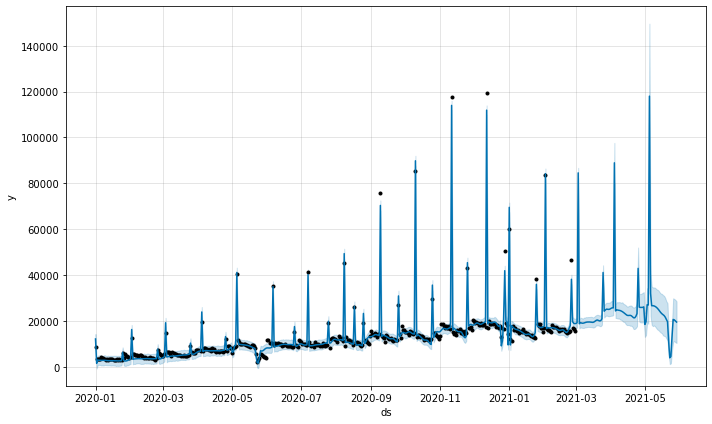

In [138]:
fig1 = m.plot(forecast)

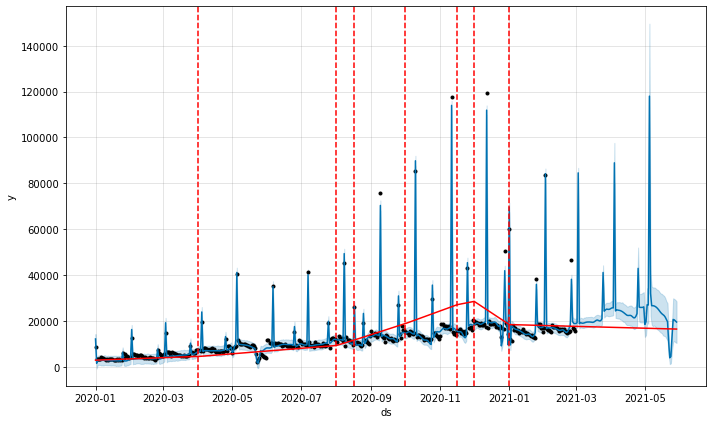

In [139]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

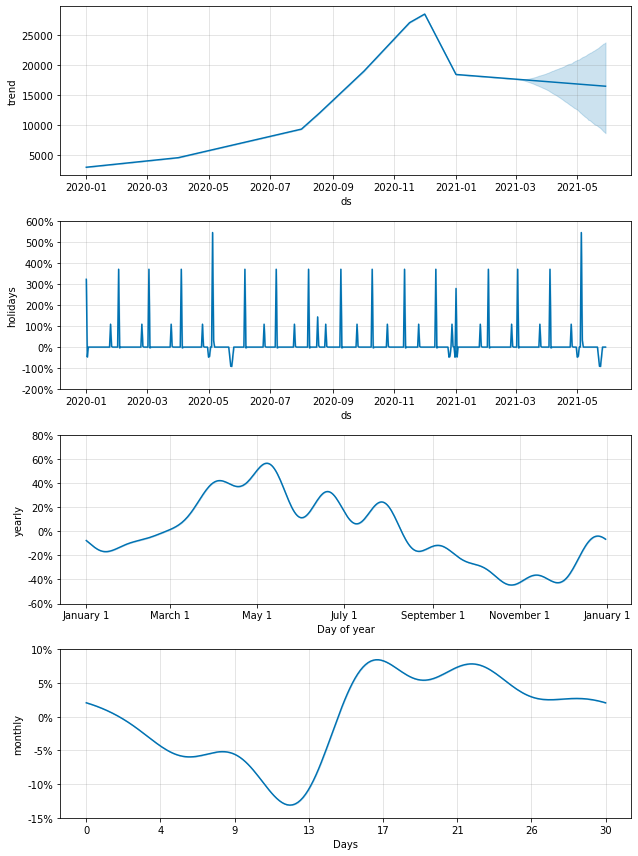

In [140]:
fig2 = m.plot_components(forecast)

The trend is still decreased.

## Cross-validation

[Reference](https://stackoverflow.com/questions/63780573/trying-to-understand-fb-prophet-cross-validation)

We are using forward chaining cross validation technique for time series forecasting. With the same logic from changepoint_range, we are using data from January 2020 to January 2021 as our training data, to predict the February 2021. Because we are only predicting one month, let's split it into 4 models and predict every 7 days.

In [141]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='396 days', period='7 days', horizon = '7 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

In [142]:
df_cv

ds          yhat    yhat_lower    yhat_upper        y     cutoff
0  2021-02-01  16440.795524  14448.941683  18619.110694  16715.0 2021-01-31
1  2021-02-02  50175.243313  48134.848646  52257.356362  83573.0 2021-01-31
2  2021-02-03  14987.773908  12922.006687  17010.856742  16548.0 2021-01-31
3  2021-02-04  14745.491056  12700.386820  16803.631963  16217.0 2021-01-31
4  2021-02-05  14183.569143  11962.789869  16260.051499  15892.0 2021-01-31
5  2021-02-06  13623.195854  11420.450976  15636.137871  15574.0 2021-01-31
6  2021-02-07  13025.963992  10909.583043  15114.844256  15107.0 2021-01-31
7  2021-02-08  16435.754564  14186.032795  18604.244941  18129.0 2021-02-07
8  2021-02-09  16429.439276  14011.222972  18854.649655  17222.0 2021-02-07
9  2021-02-10  16353.856107  14063.321904  18762.967891  17567.0 2021-02-07
10 2021-02-11  16141.294902  13772.309229  18339.262134  17215.0 2021-02-07
11 2021-02-12  15819.231567  13571.056083  18097.355255  17043.0 2021-02-07
12 2021-02-13  15526.508717  13190.411465  17971.561791  16361.0 2021-02-07
13 2021-02-14  15424.961447  13522.128391  17649.684504  15707.0 2021-02-07
14 2021-02-15  16696.592541  14775.455011  18688.196697  16492.0 2021-02-14
15 2021-02-16  17014.231209  15071.132036  19122.369376  15998.0 2021-02-14
16 2021-02-17  17273.452057  15304.309109  19285.529845  16318.0 2021-02-14
17 2021-02-18  17315.546128  15297.801779  19324.660127  16481.0 2021-02-14
18 2021-02-19  17181.344987  15283.780788  19039.504560  15657.0 2021-02-14
19 2021-02-20  17136.991696  15008.663968  19103.015407  15344.0 2021-02-14
20 2021-02-21  17507.173397  15617.030057  19541.758295  14576.0 2021-02-14
21 2021-02-22  16717.093745  14573.495989  18974.513262  15597.0 2021-02-21
22 2021-02-23  17838.749823  15693.071583  20149.447548  15285.0 2021-02-21
23 2021-02-24  18852.950650  16769.301501  21111.181712  15590.0 2021-02-21
24 2021-02-25  34524.914579  32399.778884  36577.547022  46771.0 2021-02-21
25 2021-02-26  19918.198117  17820.144348  22001.138610  17134.0 2021-02-21
26 2021-02-27  19592.094613  17415.863746  21852.111706  16620.0 2021-02-21
27 2021-02-28  19598.571092  17286.601732  21935.507960  15789.0 2021-02-21

In [143]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

horizon           mse          rmse          mae      mape     mdape  \
0  1 days  1.059684e+06   1029.409577   823.034049  0.048506  0.044110   
1  2 days  2.808982e+08  16760.016917  9440.074611  0.169060  0.115299   
2  3 days  3.866440e+06   1966.326470  1747.943173  0.107798  0.081671   
3  4 days  3.849531e+07   6204.459215  3906.461398  0.116394  0.076554   
4  5 days  3.622933e+06   1903.400376  1810.185598  0.109790  0.102431   
5  6 days  4.137545e+06   2034.095507  1887.595434  0.117986  0.121057   
6  7 days  6.878717e+06   2622.730733  2275.954763  0.149521  0.169424   

      smape  coverage  
0  0.049043      1.00  
1  0.190569      0.50  
2  0.104208      0.75  
3  0.127522      0.75  
4  0.107803      0.75  
5  0.115130      0.75  
6  0.141023      0.50

C:\Anaconda\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Anaconda\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


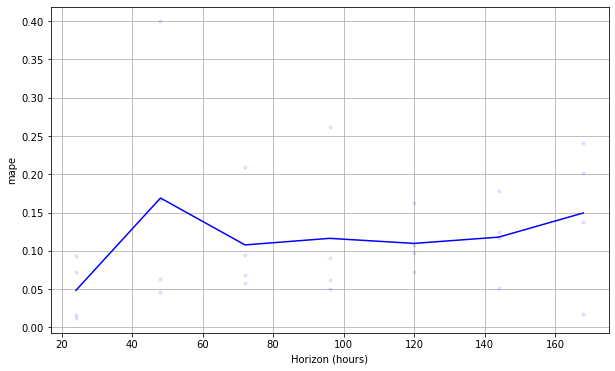

In [144]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

The increase of MAPE in day 2 caused by DDC total order prediction which is lowered than the actual value. Also, the forecasting model didn't capture the declining pattern in last Feb 2021, thus resulting in increase MAPE in day 7. Other than that, the MAPE is quite stable around 10-11%.

## Hyperparameter Tuning

Can we improve the model?

In [145]:
import itertools

Based on documentation, we can play with the flexibility of the trend using three parameters: changepoint, seasonality, and holidays prior scale. Let's hyperparameter them.

1. Change point prior scale: If the trend changes are being too overfit or underfit, you can adjust the strength of the sparse prior using this argument. By default, the parameter is set to 0.05. Increasing it will make the trend more flexible.
2. Seasonality prior scale: Default=10. Reducing this parameter will dampen the seasonality effects on the model.
3. Holidays prior scale: If you find that the holidays are overfitting, you can adjust their prior scale to smooth them using this parameter. By default, this parameter is set to 10. Reducing this parameter dampens holiday effects.

By our previous result, there are only 7 changepoints. Maybe increasing it will make the model more complex, by capturing more changepoints. Our campaign total order prediction is lower than the actual value, increasing the holiday effect will probably lead to more greater value of total order. For seasonality, let's stick with the recommended value from PROPHET documentation.

In [146]:
param_grid = {  
    'changepoint_prior_scale': [0.05, 0.1, 0.25, 0.5, 0.75],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [10.0, 11.00, 12.00, 13.00, 15.00]
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
mape = []  # Store the MAPEs for each params here

In [147]:
for params in all_params:
    # Base model with campaign and holidays, with multiplicative yearly 
    m = Prophet(holidays=CaHoDay,weekly_seasonality=False,seasonality_mode='multiplicative',yearly_seasonality=True, changepoint_range=0.9, **params) # Campaign and Holiday
    # Add seasonality
    m.add_seasonality(name='monthly', period=30, fourier_order=5, mode='multiplicative')
    # Fit the model to df_prophet
    m.fit(df_prophet)
    df_cv = cross_validation(m, initial='396 days', period='7 days', horizon = '7 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    mape.append(df_p['mape'].values[0])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

In [148]:
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['mape'] = mape
print(tuning_results)

    changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
0                      0.05                     0.01                  10.0   
1                      0.05                     0.01                  11.0   
2                      0.05                     0.01                  12.0   
3                      0.05                     0.01                  13.0   
4                      0.05                     0.01                  15.0   
5                      0.05                     0.10                  10.0   
6                      0.05                     0.10                  11.0   
7                      0.05                     0.10                  12.0   
8                      0.05                     0.10                  13.0   
9                      0.05                     0.10                  15.0   
10                     0.05                     1.00                  10.0   
11                     0.05                     1.00            

In [150]:
tuning_results[tuning_results['mape']<0.1].sort_values('mape')

changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
41                     0.25                     0.01                  11.0   
43                     0.25                     0.01                  13.0   
44                     0.25                     0.01                  15.0   
42                     0.25                     0.01                  12.0   
40                     0.25                     0.01                  10.0   
60                     0.50                     0.01                  10.0   
64                     0.50                     0.01                  15.0   
63                     0.50                     0.01                  13.0   
61                     0.50                     0.01                  11.0   
62                     0.50                     0.01                  12.0   
82                     0.75                     0.01                  12.0   

        mape  
41  0.090579  
43  0.091750  
44  0.091852  
42  0.092596  
40  0.092699  
60  0.095443  
64  0.096187  
63  0.096941  
61  0.097470  
62  0.097561  
82  0.099930

In [151]:
tuning_results[tuning_results['mape']==tuning_results['mape'].min()]

changepoint_prior_scale  seasonality_prior_scale  holidays_prior_scale  \
41                     0.25                     0.01                  11.0   

        mape  
41  0.090579

## Final Model

In [172]:
# Base model with campaign and holidays, with multiplicative yearly 
m = Prophet(holidays=CaHoDay,weekly_seasonality=False,seasonality_mode='multiplicative',yearly_seasonality=True, changepoint_range=0.9,
            changepoint_prior_scale=0.25, seasonality_prior_scale=0.01, holidays_prior_scale=11) # Campaign and Holiday
# Add seasonality
m.add_seasonality(name='monthly', period=30, fourier_order=5, mode='multiplicative')
# Fit the model to df_prophet
m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [173]:
future = m.make_future_dataframe(periods=90)
future.tail()

ds
510 2021-05-25
511 2021-05-26
512 2021-05-27
513 2021-05-28
514 2021-05-29

In [174]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat   yhat_lower    yhat_upper
510 2021-05-25  15914.083612  5819.927354  25936.190699
511 2021-05-26  23605.935600  7394.778851  37513.472602
512 2021-05-27  23805.304844  8152.347247  38294.365973
513 2021-05-28  23747.928854  7293.612558  38371.042066
514 2021-05-29  23614.161470  7387.692017  38544.394955

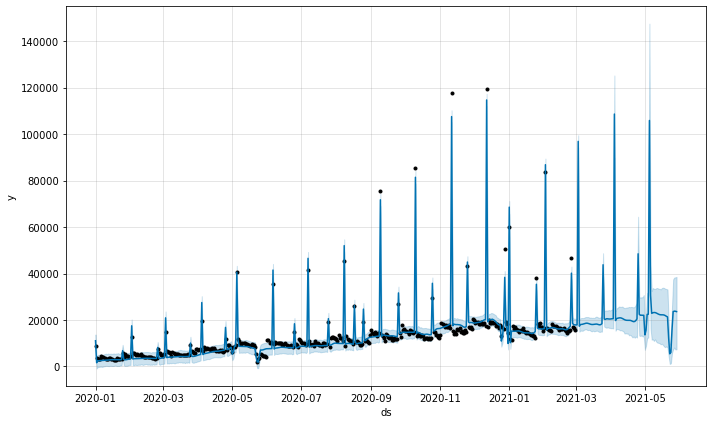

In [175]:
fig1 = m.plot(forecast)

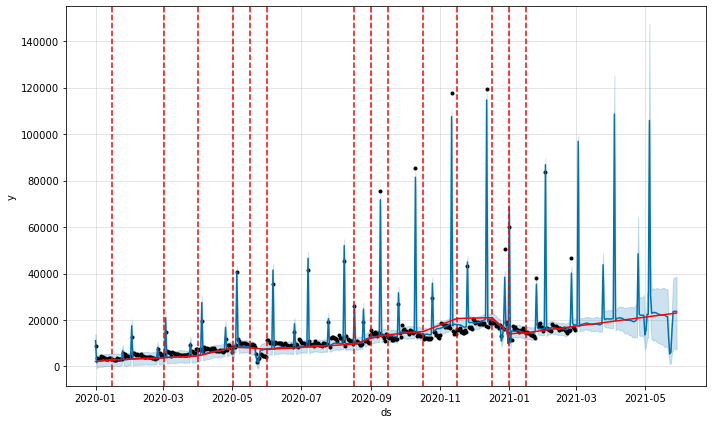

In [176]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

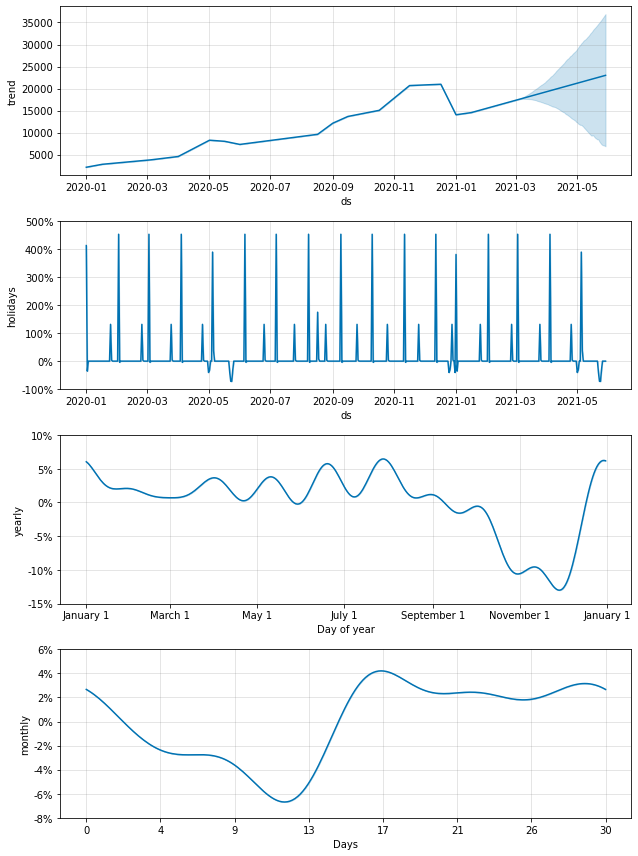

In [177]:
fig2 = m.plot_components(forecast)

In [178]:
df_cv = cross_validation(m, initial='396 days', period='7 days', horizon = '7 days')

INFO:prophet:Making 4 forecasts with cutoffs between 2021-01-31 00:00:00 and 2021-02-21 00:00:00


  0%|          | 0/4 [00:00<?, ?it/s]

In [179]:
df_cv

ds          yhat    yhat_lower    yhat_upper        y     cutoff
0  2021-02-01  14922.368142  12160.615045  17650.950855  16715.0 2021-01-31
1  2021-02-02  76924.901490  74141.944321  79716.615985  83573.0 2021-01-31
2  2021-02-03  14144.835633  11515.415379  17066.136827  16548.0 2021-01-31
3  2021-02-04  14522.744131  11447.105624  17381.665404  16217.0 2021-01-31
4  2021-02-05  14407.411254  11800.280262  17323.024961  15892.0 2021-01-31
5  2021-02-06  14311.985873  11278.431731  17037.627101  15574.0 2021-01-31
6  2021-02-07  14231.973506  11347.797418  16941.164206  15107.0 2021-01-31
7  2021-02-08  15783.707351  12976.767546  18661.932446  18129.0 2021-02-07
8  2021-02-09  15684.393065  12797.612634  18561.299431  17222.0 2021-02-07
9  2021-02-10  15484.058422  12788.198129  18191.493897  17567.0 2021-02-07
10 2021-02-11  15223.970317  12414.005862  17897.524167  17215.0 2021-02-07
11 2021-02-12  14982.822023  12441.684629  17786.659675  17043.0 2021-02-07
12 2021-02-13  14829.305255  11920.362783  17642.793131  16361.0 2021-02-07
13 2021-02-14  14778.692482  11944.143729  17781.000308  15707.0 2021-02-07
14 2021-02-15  16177.486101  13530.368595  18764.111331  16492.0 2021-02-14
15 2021-02-16  16210.421828  13778.947509  19032.684191  15998.0 2021-02-14
16 2021-02-17  16152.063887  13650.845920  18717.205134  16318.0 2021-02-14
17 2021-02-18  16003.760877  13365.353364  18476.848439  16481.0 2021-02-14
18 2021-02-19  15843.785641  13266.032267  18335.665366  15657.0 2021-02-14
19 2021-02-20  15788.061701  12955.977684  18448.777889  15344.0 2021-02-14
20 2021-02-21  15925.987743  13322.538523  18411.661820  14576.0 2021-02-14
21 2021-02-22  16822.081057  14228.815624  19251.455782  15597.0 2021-02-21
22 2021-02-23  17448.871073  14941.292164  20005.957369  15285.0 2021-02-21
23 2021-02-24  18024.476043  15348.100617  20434.674416  15590.0 2021-02-21
24 2021-02-25  40555.606162  38068.341421  43027.758059  46771.0 2021-02-21
25 2021-02-26  19360.146917  16643.737131  21881.693134  17134.0 2021-02-21
26 2021-02-27  18606.686529  15973.724358  21251.765294  16620.0 2021-02-21
27 2021-02-28  18588.200544  16128.865933  21111.276705  15789.0 2021-02-21

In [180]:
df_p = performance_metrics(df_cv)
df_p

horizon           mse         rmse          mae      mape     mdape  \
0  1 days  2.578417e+06  1605.745090  1419.379866  0.083558  0.092896   
1  2 days  1.282223e+07  3580.813802  2640.499587  0.080919  0.084415   
2  3 days  4.017013e+06  2004.248799  1771.629525  0.107530  0.131898   
3  4 days  1.142339e+07  3379.851324  2594.479628  0.095494  0.110065   
4  5 days  2.859739e+06  1691.076285  1489.424820  0.089039  0.107149   
5  6 days  2.020721e+06  1421.520542  1306.114276  0.080782  0.087326   
6  7 days  2.821354e+06  1679.688721  1488.130575  0.096732  0.075859   

      smape  coverage  
0  0.086617      1.00  
1  0.080424      0.75  
2  0.109427      1.00  
3  0.101180      0.75  
4  0.090128      1.00  
5  0.080998      1.00  
6  0.092980      0.75

C:\Anaconda\lib\site-packages\prophet\plot.py:539: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
C:\Anaconda\lib\site-packages\prophet\plot.py:540: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


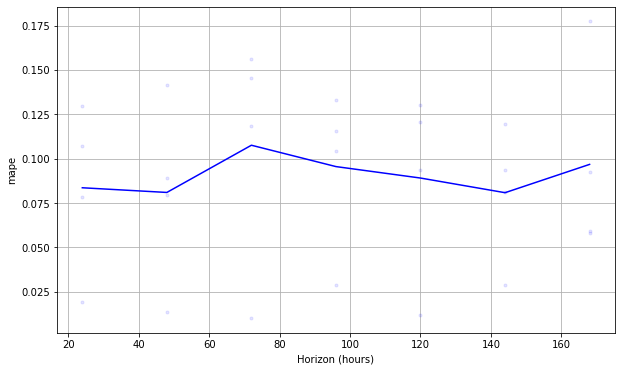

In [181]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

With hyperparameter tuning, the model was improved.

# Delivery Projection

Now, from the projected total order, let's project the delivery.

In [182]:
deliv=forecast[['ds', 'yhat']].iloc[425:456]
deliv=deliv.rename(columns={'yhat':'Total Order','ds':'Order Date'})
deliv.reset_index(inplace=True,drop=True)

In [183]:
DayName = []
for i in range(len(deliv)):
    DayName.append(deliv['Order Date'][i].strftime('%A'))
deliv['Day']=DayName

In [184]:
deliv['Delivery D+1']=None
deliv['Delivery D+2']=None
deliv['Delivery D+3']=None
deliv['Delivery D+4']=None
deliv['Delivery D+5']=None
deliv['Delivery >=D+6']=None

In [185]:
deliv

Order Date   Total Order        Day Delivery D+1 Delivery D+2 Delivery D+3  \
0  2021-03-01  17869.119065     Monday         None         None         None   
1  2021-03-02  17922.338142    Tuesday         None         None         None   
2  2021-03-03  96896.663368  Wednesday         None         None         None   
3  2021-03-04  17328.293815   Thursday         None         None         None   
4  2021-03-05  18073.177448     Friday         None         None         None   
5  2021-03-06  18098.139122   Saturday         None         None         None   
6  2021-03-07  18187.350007     Sunday         None         None         None   
7  2021-03-08  18345.364121     Monday         None         None         None   
8  2021-03-09  18516.439235    Tuesday         None         None         None   
9  2021-03-10  18622.451627  Wednesday         None         None         None   
10 2021-03-11  18614.364720   Thursday         None         None         None   
11 2021-03-12  18498.297359     Friday         None         None         None   
12 2021-03-13  18325.404802   Saturday         None         None         None   
13 2021-03-14  18162.791716     Sunday         None         None         None   
14 2021-03-15  18066.454047     Monday         None         None         None   
15 2021-03-16  18062.759976    Tuesday         None         None         None   
16 2021-03-17  18135.912729  Wednesday         None         None         None   
17 2021-03-18  18226.325608   Thursday         None         None         None   
18 2021-03-19  18254.093931     Friday         None         None         None   
19 2021-03-20  18170.854427   Saturday         None         None         None   
20 2021-03-21  18013.158972     Sunday         None         None         None   
21 2021-03-22  17910.718050     Monday         None         None         None   
22 2021-03-23  18023.318138    Tuesday         None         None         None   
23 2021-03-24  18435.253946  Wednesday         None         None         None   
24 2021-03-25  43780.979778   Thursday         None         None         None   
25 2021-03-26  20404.964224     Friday         None         None         None   
26 2021-03-27  20277.475745   Saturday         None         None         None   
27 2021-03-28  20509.007963     Sunday         None         None         None   
28 2021-03-29  20511.660466     Monday         None         None         None   
29 2021-03-30  20433.931539    Tuesday         None         None         None   
30 2021-03-31  20406.406105  Wednesday         None         None         None   

   Delivery D+4 Delivery D+5 Delivery >=D+6  
0          None         None           None  
1          None         None           None  
2          None         None           None  
3          None         None           None  
4          None         None           None  
5          None         None           None  
6          None         None           None  
7          None         None           None  
8          None         None           None  
9          None         None           None  
10         None         None           None  
11         None         None           None  
12         None         None           None  
13         None         None           None  
14         None         None           None  
15         None         None           None  
16         None         None           None  
17         None         None           None  
18         None         None           None  
19         None         None           None  
20         None         None           None  
21         None         None           None  
22         None         None           None  
23         None         None           None  
24         None         None           None  
25         None         None           None  
26         None         None           None  
27         None         None           None  
28         None         None           None  
29         None         None  

In [186]:
deliv['DDC']=np.where(deliv['Order Date']=='2021-03-03',1,0)
deliv['GC']=np.where(deliv['Order Date']=='2021-03-25',1,0)
deliv['Campaign']=np.where((deliv['DDC']==1)|(deliv['GC']==1),1,0)
deliv

Order Date   Total Order        Day Delivery D+1 Delivery D+2 Delivery D+3  \
0  2021-03-01  17869.119065     Monday         None         None         None   
1  2021-03-02  17922.338142    Tuesday         None         None         None   
2  2021-03-03  96896.663368  Wednesday         None         None         None   
3  2021-03-04  17328.293815   Thursday         None         None         None   
4  2021-03-05  18073.177448     Friday         None         None         None   
5  2021-03-06  18098.139122   Saturday         None         None         None   
6  2021-03-07  18187.350007     Sunday         None         None         None   
7  2021-03-08  18345.364121     Monday         None         None         None   
8  2021-03-09  18516.439235    Tuesday         None         None         None   
9  2021-03-10  18622.451627  Wednesday         None         None         None   
10 2021-03-11  18614.364720   Thursday         None         None         None   
11 2021-03-12  18498.297359     Friday         None         None         None   
12 2021-03-13  18325.404802   Saturday         None         None         None   
13 2021-03-14  18162.791716     Sunday         None         None         None   
14 2021-03-15  18066.454047     Monday         None         None         None   
15 2021-03-16  18062.759976    Tuesday         None         None         None   
16 2021-03-17  18135.912729  Wednesday         None         None         None   
17 2021-03-18  18226.325608   Thursday         None         None         None   
18 2021-03-19  18254.093931     Friday         None         None         None   
19 2021-03-20  18170.854427   Saturday         None         None         None   
20 2021-03-21  18013.158972     Sunday         None         None         None   
21 2021-03-22  17910.718050     Monday         None         None         None   
22 2021-03-23  18023.318138    Tuesday         None         None         None   
23 2021-03-24  18435.253946  Wednesday         None         None         None   
24 2021-03-25  43780.979778   Thursday         None         None         None   
25 2021-03-26  20404.964224     Friday         None         None         None   
26 2021-03-27  20277.475745   Saturday         None         None         None   
27 2021-03-28  20509.007963     Sunday         None         None         None   
28 2021-03-29  20511.660466     Monday         None         None         None   
29 2021-03-30  20433.931539    Tuesday         None         None         None   
30 2021-03-31  20406.406105  Wednesday         None         None         None   

   Delivery D+4 Delivery D+5 Delivery >=D+6  DDC  GC  Campaign  
0          None         None           None    0   0         0  
1          None         None           None    0   0         0  
2          None         None           None    1   0         1  
3          None         None           None    0   0         0  
4          None         None           None    0   0         0  
5          None         None           None    0   0         0  
6          None         None           None    0   0         0  
7          None         None           None    0   0         0  
8          None         None           None    0   0         0  
9          None         None           None    0   0         0  
10         None         None           None    0   0         0  
11         None         None           None    0   0         0  
12         None         None           None    0   0         0  
13         None         None           None    0   0         0  
14         None         None           None    0   0         0  
15         None         None           None    0   0         0  
16         None         None           None    0   0         0  
17         None         None           None    0   0         0  
18         None         None           None    0   0         0  
19         None         None           None    0   0         0  
20         None         None           None  

## DDC

In [187]:
for_DDC=df2[(df2['Double-Double Campaign']==1)&(df2['Month']%2==0)][['Order Date','PercentD+1','PercentD+2','PercentD+3','PercentD+4','PercentD+5','PercentD6+','Month']].reset_index(drop=True)
for_DDC=for_DDC.iloc[1:6].mean().reset_index().iloc[0:6]
for_DDC=for_DDC.rename(columns={0:'Change','index':'Delivery'})
for_DDC

C:\Users\CHINKI~1\AppData\Local\Temp/ipykernel_26000/1074162406.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  for_DDC=for_DDC.iloc[1:6].mean().reset_index().iloc[0:6]


Delivery     Change
0  PercentD+1   1.660566
1  PercentD+2   1.000108
2  PercentD+3  31.279779
3  PercentD+4  25.900347
4  PercentD+5  26.759871
5  PercentD6+  13.399329

In [188]:
deliv.loc[deliv['DDC']==1,'Delivery D+1']=round(deliv['Total Order']*1.660566/100)
deliv.loc[deliv['DDC']==1,'Delivery D+2']=round(deliv['Total Order']*1.000108/100)
deliv.loc[deliv['DDC']==1,'Delivery D+3']=round(deliv['Total Order']*31.279779/100)
deliv.loc[deliv['DDC']==1,'Delivery D+4']=round(deliv['Total Order']*25.900347/100)
deliv.loc[deliv['DDC']==1,'Delivery D+5']=round(deliv['Total Order']*26.759871/100)
deliv.loc[deliv['DDC']==1,'Delivery >=D+6']=deliv['Total Order']-deliv['Delivery D+1']-deliv['Delivery D+2']-deliv['Delivery D+3']-deliv['Delivery D+4']-deliv['Delivery D+5']
deliv[deliv['DDC']==1]

Order Date   Total Order        Day Delivery D+1 Delivery D+2 Delivery D+3  \
2 2021-03-03  96896.663368  Wednesday       1609.0        969.0      30309.0   

  Delivery D+4 Delivery D+5 Delivery >=D+6  DDC  GC  Campaign  
2      25097.0      25929.0   12983.663368    1   0         1

## Gajian Sale

In [189]:
# (100%)x = (19%)x + (28%)x + (22%)x + (13%)x + (11%)x + (7%)x
deliv.loc[deliv['GC']==1,'Delivery D+1']=round(deliv['Total Order']*19/100)
deliv.loc[deliv['GC']==1,'Delivery D+2']=round(deliv['Total Order']*28/100)
deliv.loc[deliv['GC']==1,'Delivery D+3']=round(deliv['Total Order']*22/100)
deliv.loc[deliv['GC']==1,'Delivery D+4']=round(deliv['Total Order']*13/100)
deliv.loc[deliv['GC']==1,'Delivery D+5']=round(deliv['Total Order']*11/100)
deliv.loc[deliv['GC']==1,'Delivery >=D+6']=deliv['Total Order']-deliv['Delivery D+1']-deliv['Delivery D+2']-deliv['Delivery D+3']-deliv['Delivery D+4']-deliv['Delivery D+5']
deliv[deliv['GC']==1]

Order Date   Total Order       Day Delivery D+1 Delivery D+2 Delivery D+3  \
24 2021-03-25  43780.979778  Thursday       8318.0      12259.0       9632.0   

   Delivery D+4 Delivery D+5 Delivery >=D+6  DDC  GC  Campaign  
24       5692.0       4816.0    3063.979778    0   1         1

## Non Campaign

In [190]:
df3.groupby('DayName')[['PercentD+1','PercentD+2','PercentD+3','PercentD+4','PercentD+5','PercentD6+']].mean().reindex(['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday','Saturday','Sunday'])

PercentD+1  PercentD+2  PercentD+3  PercentD+4  PercentD+5  \
DayName                                                                 
Monday      17.927915   27.937247   21.884294   12.941896   10.989380   
Tuesday     17.933580   28.029847   22.018760   13.050936    7.955998   
Wednesday   18.044586   28.034841   17.999422    4.951517   19.919456   
Thursday    17.731545   16.638311    5.949978   25.606311   20.589538   
Friday      15.761062    9.691658   29.593634   16.657447   13.737437   
Saturday     1.831254    1.152266   30.360813   25.533313   26.458847   
Sunday       1.949153   16.668120   22.661560   25.579728   17.847588   

           PercentD6+  
DayName                
Monday       8.319269  
Tuesday     11.010879  
Wednesday   11.050178  
Thursday    13.484316  
Friday      14.558762  
Saturday    14.663507  
Sunday      15.293850

### Monday

In [191]:
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Monday'),'Delivery D+1']=round(deliv['Total Order']*17.927915/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Monday'),'Delivery D+2']=round(deliv['Total Order']*27.937247/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Monday'),'Delivery D+3']=round(deliv['Total Order']*21.884294/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Monday'),'Delivery D+4']=round(deliv['Total Order']*12.941896/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Monday'),'Delivery D+5']=round(deliv['Total Order']*10.989380/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Monday'),'Delivery >=D+6']=deliv['Total Order']-deliv['Delivery D+1']-deliv['Delivery D+2']-deliv['Delivery D+3']-deliv['Delivery D+4']-deliv['Delivery D+5']

### Tuesday

In [192]:
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Tuesday'),'Delivery D+1']=round(deliv['Total Order']*17.933580/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Tuesday'),'Delivery D+2']=round(deliv['Total Order']*28.029847/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Tuesday'),'Delivery D+3']=round(deliv['Total Order']*22.018760/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Tuesday'),'Delivery D+4']=round(deliv['Total Order']*13.050936/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Tuesday'),'Delivery D+5']=round(deliv['Total Order']*7.955998/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Tuesday'),'Delivery >=D+6']=deliv['Total Order']-deliv['Delivery D+1']-deliv['Delivery D+2']-deliv['Delivery D+3']-deliv['Delivery D+4']-deliv['Delivery D+5']

### Wednesday

In [193]:
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Wednesday'),'Delivery D+1']=round(deliv['Total Order']*18.044586/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Wednesday'),'Delivery D+2']=round(deliv['Total Order']*28.034841/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Wednesday'),'Delivery D+3']=round(deliv['Total Order']*17.999422/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Wednesday'),'Delivery D+4']=round(deliv['Total Order']*4.951517/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Wednesday'),'Delivery D+5']=round(deliv['Total Order']*19.919456/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Wednesday'),'Delivery >=D+6']=deliv['Total Order']-deliv['Delivery D+1']-deliv['Delivery D+2']-deliv['Delivery D+3']-deliv['Delivery D+4']-deliv['Delivery D+5']

### Thursday

In [194]:
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Thursday'),'Delivery D+1']=round(deliv['Total Order']*17.731545/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Thursday'),'Delivery D+2']=round(deliv['Total Order']*16.638311/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Thursday'),'Delivery D+3']=round(deliv['Total Order']*5.949978/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Thursday'),'Delivery D+4']=round(deliv['Total Order']*25.606311/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Thursday'),'Delivery D+5']=round(deliv['Total Order']*20.589538/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Thursday'),'Delivery >=D+6']=deliv['Total Order']-deliv['Delivery D+1']-deliv['Delivery D+2']-deliv['Delivery D+3']-deliv['Delivery D+4']-deliv['Delivery D+5']

### Friday

In [195]:
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Friday'),'Delivery D+1']=round(deliv['Total Order']*15.761062/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Friday'),'Delivery D+2']=round(deliv['Total Order']*9.691658/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Friday'),'Delivery D+3']=round(deliv['Total Order']*29.593634/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Friday'),'Delivery D+4']=round(deliv['Total Order']*16.657447/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Friday'),'Delivery D+5']=round(deliv['Total Order']*13.737437/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Friday'),'Delivery >=D+6']=deliv['Total Order']-deliv['Delivery D+1']-deliv['Delivery D+2']-deliv['Delivery D+3']-deliv['Delivery D+4']-deliv['Delivery D+5']

### Saturday

In [196]:
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Saturday'),'Delivery D+1']=round(deliv['Total Order']*1.831254/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Saturday'),'Delivery D+2']=round(deliv['Total Order']*1.152266/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Saturday'),'Delivery D+3']=round(deliv['Total Order']*30.360813/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Saturday'),'Delivery D+4']=round(deliv['Total Order']*25.533313/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Saturday'),'Delivery D+5']=round(deliv['Total Order']*26.458847/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Saturday'),'Delivery >=D+6']=deliv['Total Order']-deliv['Delivery D+1']-deliv['Delivery D+2']-deliv['Delivery D+3']-deliv['Delivery D+4']-deliv['Delivery D+5']

### Sunday

In [197]:
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Sunday'),'Delivery D+1']=round(deliv['Total Order']*1.949153/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Sunday'),'Delivery D+2']=round(deliv['Total Order']*16.668120/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Sunday'),'Delivery D+3']=round(deliv['Total Order']*22.661560/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Sunday'),'Delivery D+4']=round(deliv['Total Order']*25.579728/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Sunday'),'Delivery D+5']=round(deliv['Total Order']*17.847588/100)
deliv.loc[(deliv['Campaign']==0)&(deliv['Day']=='Sunday'),'Delivery >=D+6']=deliv['Total Order']-deliv['Delivery D+1']-deliv['Delivery D+2']-deliv['Delivery D+3']-deliv['Delivery D+4']-deliv['Delivery D+5']

### Final Delivery Projection

In [198]:
deliv

Order Date   Total Order        Day Delivery D+1 Delivery D+2 Delivery D+3  \
0  2021-03-01  17869.119065     Monday       3204.0       4992.0       3911.0   
1  2021-03-02  17922.338142    Tuesday       3214.0       5024.0       3946.0   
2  2021-03-03  96896.663368  Wednesday       1609.0        969.0      30309.0   
3  2021-03-04  17328.293815   Thursday       3073.0       2883.0       1031.0   
4  2021-03-05  18073.177448     Friday       2849.0       1752.0       5349.0   
5  2021-03-06  18098.139122   Saturday        331.0        209.0       5495.0   
6  2021-03-07  18187.350007     Sunday        354.0       3031.0       4122.0   
7  2021-03-08  18345.364121     Monday       3289.0       5125.0       4015.0   
8  2021-03-09  18516.439235    Tuesday       3321.0       5190.0       4077.0   
9  2021-03-10  18622.451627  Wednesday       3360.0       5221.0       3352.0   
10 2021-03-11  18614.364720   Thursday       3301.0       3097.0       1108.0   
11 2021-03-12  18498.297359     Friday       2916.0       1793.0       5474.0   
12 2021-03-13  18325.404802   Saturday        336.0        211.0       5564.0   
13 2021-03-14  18162.791716     Sunday        354.0       3027.0       4116.0   
14 2021-03-15  18066.454047     Monday       3239.0       5047.0       3954.0   
15 2021-03-16  18062.759976    Tuesday       3239.0       5063.0       3977.0   
16 2021-03-17  18135.912729  Wednesday       3273.0       5084.0       3264.0   
17 2021-03-18  18226.325608   Thursday       3232.0       3033.0       1084.0   
18 2021-03-19  18254.093931     Friday       2877.0       1769.0       5402.0   
19 2021-03-20  18170.854427   Saturday        333.0        209.0       5517.0   
20 2021-03-21  18013.158972     Sunday        351.0       3002.0       4082.0   
21 2021-03-22  17910.718050     Monday       3211.0       5004.0       3920.0   
22 2021-03-23  18023.318138    Tuesday       3232.0       5052.0       3969.0   
23 2021-03-24  18435.253946  Wednesday       3327.0       5168.0       3318.0   
24 2021-03-25  43780.979778   Thursday       8318.0      12259.0       9632.0   
25 2021-03-26  20404.964224     Friday       3216.0       1978.0       6039.0   
26 2021-03-27  20277.475745   Saturday        371.0        234.0       6156.0   
27 2021-03-28  20509.007963     Sunday        400.0       3418.0       4648.0   
28 2021-03-29  20511.660466     Monday       3677.0       5730.0       4489.0   
29 2021-03-30  20433.931539    Tuesday       3665.0       5728.0       4499.0   
30 2021-03-31  20406.406105  Wednesday       3682.0       5721.0       3673.0   

   Delivery D+4 Delivery D+5 Delivery >=D+6  DDC  GC  Campaign  
0        2313.0       1964.0    1485.119065    0   0         0  
1        2339.0       1426.0    1973.338142    0   0         0  
2       25097.0      25929.0   12983.663368    1   0         1  
3        4437.0       3568.0    2336.293815    0   0         0  
4        3011.0       2483.0    2629.177448    0   0         0  
5        4621.0       4789.0    2653.139122    0   0         0  
6        4652.0       3246.0    2782.350007    0   0         0  
7        2374.0       2016.0    1526.364121    0   0         0  
8        2417.0       1473.0    2038.439235    0   0         0  
9         922.0       3709.0    2058.451627    0   0         0  
10       4766.0       3833.0     2509.36472    0   0         0  
11       3081.0       2541.0    2693.297359    0   0         0  
12       4679.0       4849.0    2686.404802    0   0         0  
13       4646.0       3242.0    2777.791716    0   0         0  
14       2338.0       1985.0    1503.454047    0   0         0  
15       2357.0       1437.0    1989.759976    0   0         0  
16        898.0       3613.0    2003.912729    0   0         0  
17       4667.0       3753.0    2457.325608    0   0         0  
18       3041.0       2508.0    2657.093931    0   0         0  
19       4640.0       4808.0    2663.854427    0   0         0  
20       4608.0       3215.0    2755.158972  

# Closing

It is important to note that this is my first time using FB-PROPHET. In data science bootcamp, I only learned about ARIMA. Thus, I believe that this work maybe has flaws that I don't realize and can still be improved in the future. Thanks for reading!